In [615]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [616]:
#supress scintific notation of values
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [617]:
# let your CSV file be in same level with code
data_path = 'loan.csv'
data = pd.read_csv(data_path, low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [618]:
data.shape

(39717, 111)

In [619]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [620]:
#Removing columns which has more than 30% null values in it.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [621]:
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

*'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'* columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [622]:
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [623]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

Removing the the null valued rows in the above columns except 'emp_title' and 'title'

In [624]:
data.dropna(subset=['emp_length', 'revol_util', 'last_pymnt_d', 
                           'last_credit_pull_d', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_title   3.68
title       0.03
dtype: float64

In [625]:
data.nunique().sort_values(ascending=False).head(12)

id                 37835
url                37835
member_id          37835
total_pymnt        36107
total_pymnt_inv    35800
total_rec_int      33663
last_pymnt_amnt    33553
emp_title          28213
revol_bal          21199
title              18677
installment        14720
funded_amnt_inv     7748
dtype: int64

**emp_title, and title** columns have text values which are more unique values.

In [626]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

**id, url, and member_id** having all unique values which means any one of these can be used as primary key.
Let's use **id** primary key and remove url and member id columns.

In [627]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

**total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d** Column will be recived when applied for loan so these are not needed. 
**recoveries, collection_recovery_fee** columns are only valid for charged off loans.
Will removed these colomns.

In [628]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee'], axis=1, inplace=True)

**Loan Status** Column has 3 distict values out of them we need only _Fully Paid_ and _Charged Off_. So, we will remove the rows with _Current_ values in loan status.

In [629]:
data = data[data.loan_status != 'Current']

In [630]:
data.shape

(36737, 34)

Looks like there isn't much change in the number of observation after cleaning it.

#### Variable Data types

In [631]:
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
last_pym

**int_rate and revol_util** are having % values and having data type of object. Let's remove % at the end and convert to float

In [632]:
#stripping % value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

**issue_d, earliest_cr_line, last_pymnt_d** are having date values, let convert column data type to date.

In [633]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['last_pymnt_d'] = pd.to_datetime(data.last_pymnt_d, format='%b-%y')
data['last_pymnt_d'] = data['last_pymnt_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [634]:
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

## New Feature Columns

Let's create new columns from date type columns

In [635]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
data['earliest_cr_line_weekday'] = data.earliest_cr_line.dt.weekday
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)
data['earliest_cr_line_weekday'] = data['earliest_cr_line_weekday'].astype(object)

#last_pymnt_d column
data['last_pymnt_d_year'] = data.last_pymnt_d.dt.year
data['last_pymnt_d_month'] = data.last_pymnt_d.dt.strftime('%b')
data['last_pymnt_d_weekday'] = data.last_pymnt_d.dt.weekday
#data type conversion of year and weekday
data['last_pymnt_d_year'] = data['last_pymnt_d_year'].astype(object)
data['last_pymnt_d_weekday'] = data['last_pymnt_d_weekday'].astype(object)

In [636]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_weekday,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_weekday
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.00,0.00,5863.16,5833.84,2015-01-01,171.62,0.00,2011,Dec,3,1985,Jan,1,2015,Jan,3
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,1008.71,1008.71,2013-04-01,119.66,0.00,2011,Dec,3,1999,Apr,3,2013,Apr,0
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.00,0.00,3005.67,3005.67,2014-06-01,649.91,0.00,2011,Dec,3,2001,Nov,3,2014,Jun,6
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,12231.89,12231.89,2015-01-01,357.48,0.00,2011,Dec,3,1996,Feb,3,2015,Jan,3
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,5632.21,5632.21,2015-01-01,161.03,0.00,2011,Dec,3,2004,Nov,0,2015,Jan,3


In [637]:
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

## Univariate Analysis

### Loan Amount

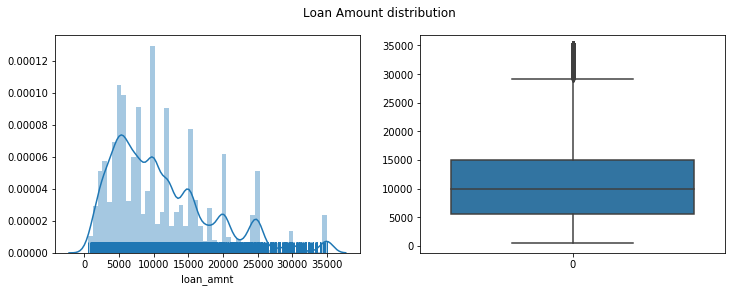

In [638]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

**Observations**:<br>
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

In [639]:
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean    11153.35
std      7368.34
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [640]:
iqr = data.loan_amnt.quantile(0.75) - data.loan_amnt.quantile(0.25)
#no of outliers at right side
outlier_val = data.loan_amnt.quantile(0.75) + 1.5*iqr
(data.loan_amnt > outlier_val).sum()

1076

In [641]:
#Outlier removal
#data = data[data.loan_amnt <= outlier_val]
#data.shape

### funded_amnt
The total amount committed to that loan at that point in time.

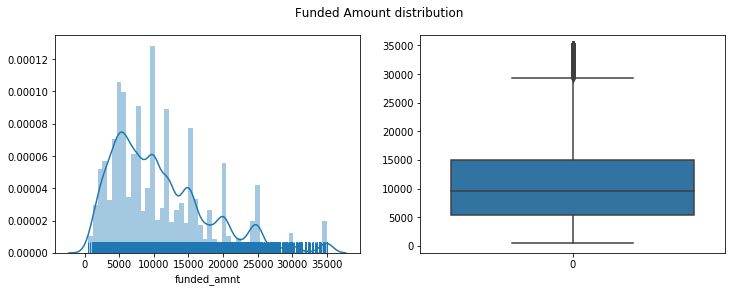

In [642]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

**Observations**:<br>
funded amount data behaves exactly same to loan Amount

In [643]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean    10884.14
std      7107.27
min       500.00
5%       2400.00
10%      3200.00
25%      5425.00
50%      9600.00
75%     15000.00
90%     20375.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

In [644]:
iqr = data.funded_amnt.quantile(0.75) - data.funded_amnt.quantile(0.25)
#no of outliers at right side
outlier_val = data.funded_amnt.quantile(0.75) + 1.5*iqr
(data.funded_amnt > outlier_val).sum()

918

In [645]:
#Removing Outliers
#data = data[data.funded_amnt <= outlier_val]
#data.shape

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

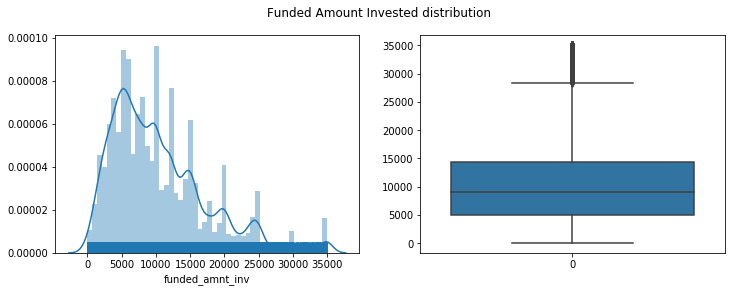

In [646]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [647]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean    10444.16
std      7008.22
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14351.55
90%     20000.00
95%     24658.31
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

In [648]:
iqr = data.funded_amnt_inv.quantile(0.75) - data.funded_amnt_inv.quantile(0.25)
#no of outliers at right side
outlier_val = data.funded_amnt_inv.quantile(0.75) + 1.5*iqr
(data.funded_amnt_inv > outlier_val).sum()

884

In [649]:
#Outlier removing
#data = data[data.funded_amnt_inv <= outlier_val]
#data.shape

### Interest Rate

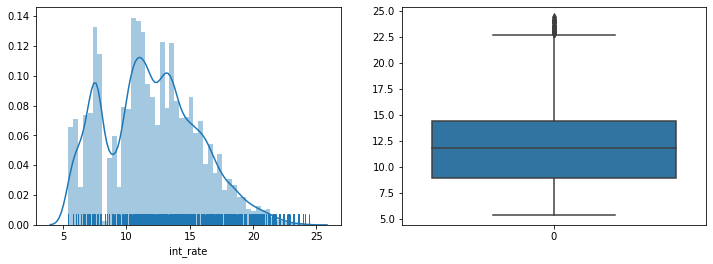

In [650]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)

**Observations**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%**. Some people took loan at higher rates of interest i.e., **22.5%**

In [652]:
iqr = data.int_rate.quantile(0.75) - data.int_rate.quantile(0.25)
outlier_val = data.int_rate.quantile(0.75) + (1.5*iqr)
print((data.int_rate > outlier_val).sum(), '****Outliers right***')

#data = data[data.int_rate <= outlier_val]
#data.shape

49 ****Outliers right***


### Installment
The monthly payment owed by the borrower if the loan originates.

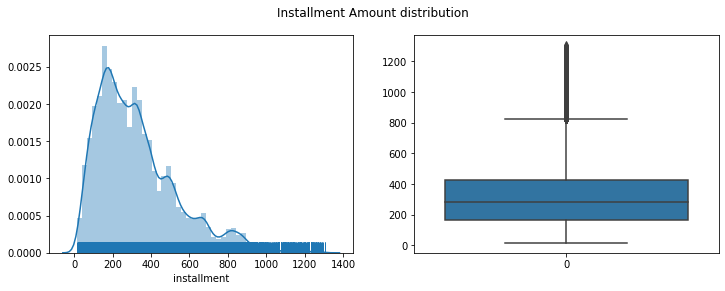

In [653]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The Most representative value of Installment amount in around 280.

In [654]:
installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean      324.99
std       208.84
min        16.08
5%         73.28
10%       100.64
25%       167.73
50%       280.28
75%       429.45
90%       622.66
95%       763.37
99%       933.11
max      1305.19
Name: installment, dtype: float64

In [655]:
iqr = installment.quantile(0.75) - installment.quantile(0.25)
#no of outliers at right side
outlier_val = installment.quantile(0.75) + 1.5*iqr
print("*****Outlier Right******", (installment > outlier_val).sum())

#removing outliers
#data = data[installment <= outlier_val]
#data.shape

*****Outlier Right****** 1224


# annual_inc
The self-reported annual income provided by the borrower during registration.

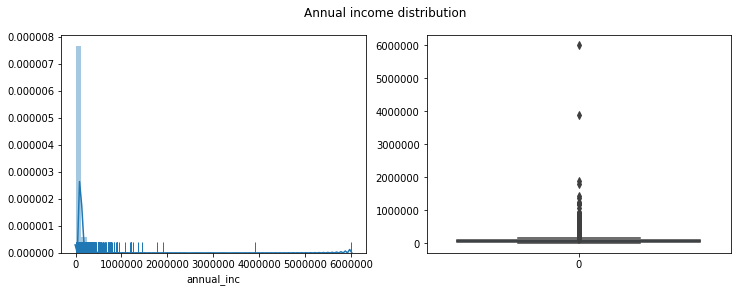

In [656]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

In [657]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     36737.00
mean      69467.23
std       64062.56
min        4000.00
5%        24000.00
10%       30000.00
25%       41200.00
50%       60000.00
75%       83000.00
90%      117000.00
95%      142000.00
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [658]:
(var1 > 235000).sum()

361

**Observations**:<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

In [659]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1705 *****Outlier Right******


# dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

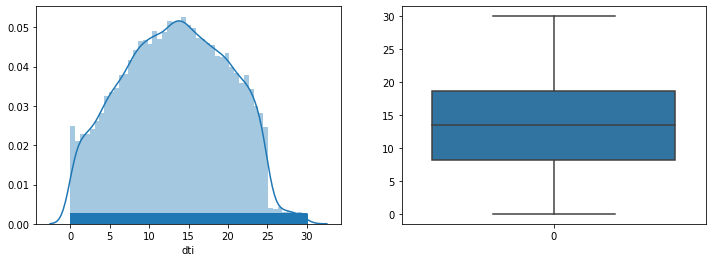

In [660]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

**Conclusions**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

# open_acc
The number of open credit lines in the borrower's credit file.

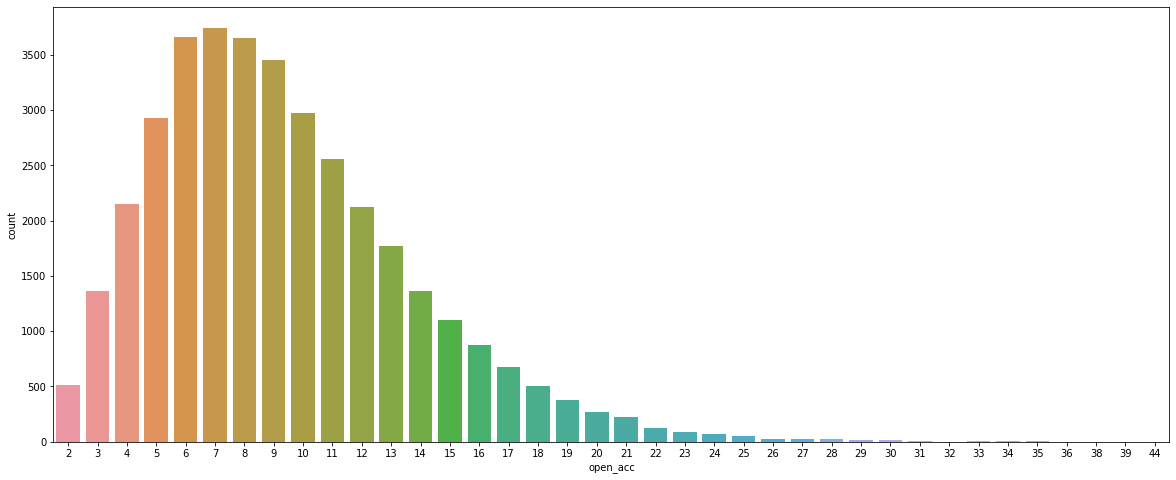

In [673]:
plt.figure(figsize=(20,8))
sns.countplot(data.open_acc)

**Observations**: <br>
Most people have no of Open credit lines between 6-9.

# delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

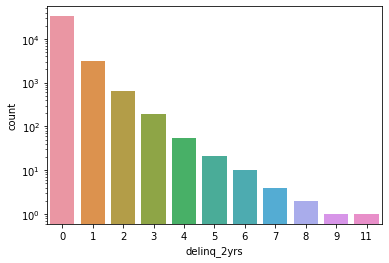

In [680]:
sns.countplot(data.delinq_2yrs)
#scalling to log to view easily
plt.yscale('log')

**Observations**: <br>
Most people have 0 delinquency in past 2 years.

# inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

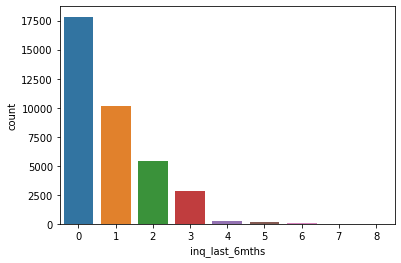

In [681]:
sns.countplot(data.inq_last_6mths)

**Observations**: <br>
Most people have 0 inquiries in past 6 months.

# pub_rec
Number of derogatory public records

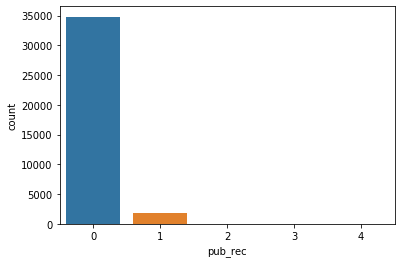

In [683]:
sns.countplot(data.pub_rec)
#scalling to log to view easily
#plt.yscale('log')

**Observations**<br>
Above 90% borrower's are having no public derogatory records.

# revol_bal
Total credit revolving balance

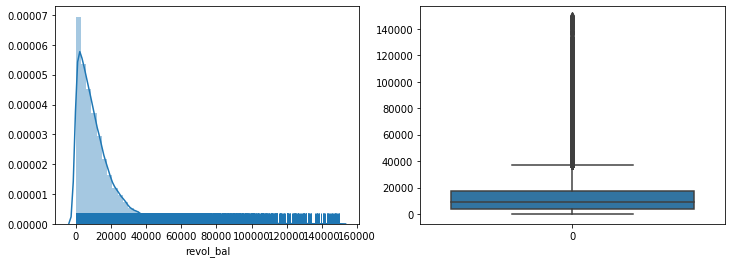

In [686]:
var1 = data.revol_bal

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [687]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36737.00
mean     13384.36
std      15856.05
min          0.00
5%         351.00
10%       1149.60
25%       3734.00
50%       8880.00
75%      17035.00
90%      29126.00
95%      41539.80
99%      83015.48
max     149588.00
Name: revol_bal, dtype: float64

In [688]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

2307 *****Outlier Right******


**Observations**:<br>
There are more outliers in revolving balance, around 6% people are having high revolving balance than others.

# revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

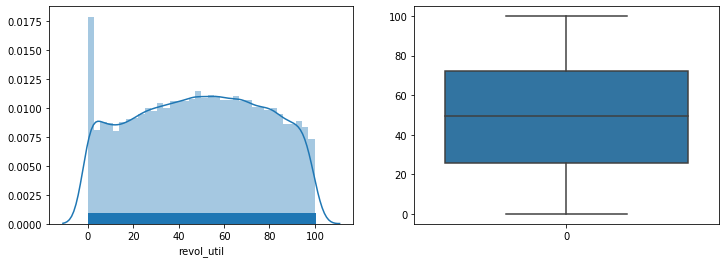

In [689]:
var1 = data.revol_util

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [692]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean       48.99
std        28.31
min         0.00
5%          2.80
10%         8.70
25%        25.60
50%        49.50
75%        72.50
90%        87.90
95%        93.60
99%        98.50
max        99.90
Name: revol_util, dtype: float64

**Observations**:<br>
Aound 3% people are having 0 revolving utilisation, and the distribtion of is pretty much flat.

# total_acc
The total number of credit lines currently in the borrower's credit file

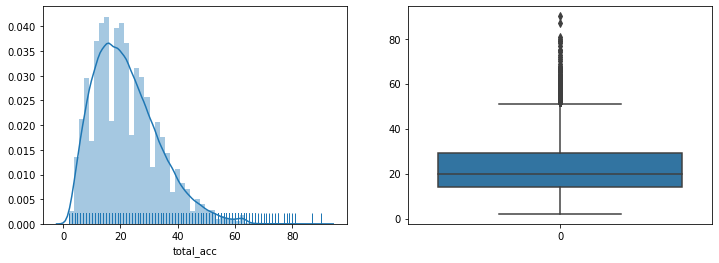

In [695]:
var1 = data.total_acc

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

**Observations**: <br>
Total Credit line is is having median values of 20.

In [696]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean       22.16
std        11.41
min         2.00
5%          7.00
10%         9.00
25%        14.00
50%        20.00
75%        29.00
90%        38.00
95%        43.00
99%        56.00
max        90.00
Name: total_acc, dtype: float64

In [697]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

667 *****Outlier Right******


# total_pymnt
Payments received to date for total amount funded

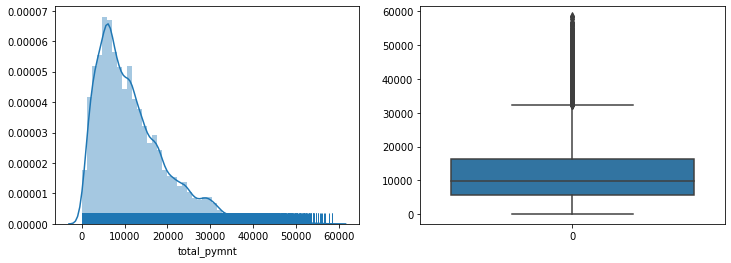

In [699]:
var1 = data.total_pymnt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [700]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean    12020.04
std      8849.47
min        33.73
5%       1968.13
10%      3022.24
25%      5590.59
50%      9832.29
75%     16322.49
90%     24337.14
95%     29835.81
99%     41645.30
max     58563.68
Name: total_pymnt, dtype: float64

In [701]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1200 *****Outlier Right******


# total_pymnt_inv
Payments received to date for portion of total amount funded by investors

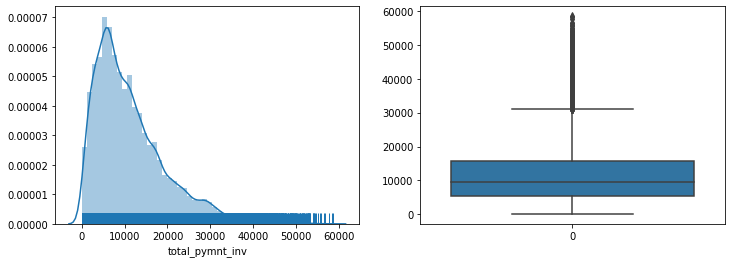

In [702]:
var1 = data.total_pymnt_inv

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [703]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean    11544.28
std      8705.78
min         0.00
5%       1639.20
10%      2687.15
25%      5291.93
50%      9375.34
75%     15637.20
90%     23646.77
95%     29220.31
99%     40595.33
max     58563.68
Name: total_pymnt_inv, dtype: float64

In [704]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

1354 *****Outlier Right******


# last_pymnt_amnt
Last total payment amount received

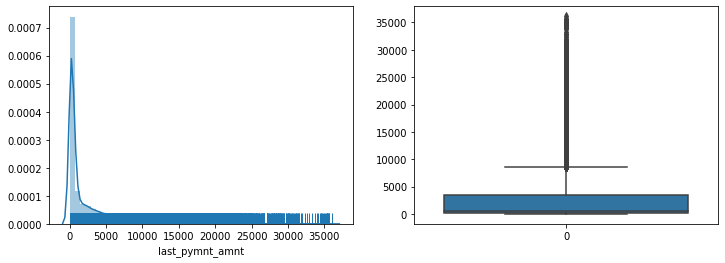

In [708]:
var1 = data.last_pymnt_amnt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)

In [709]:
var1.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36737.00
mean     2800.00
std      4537.67
min         0.01
5%         45.60
10%        98.65
25%       223.59
50%       592.13
75%      3554.11
90%      8637.55
95%     12484.81
99%     21419.64
max     36115.20
Name: last_pymnt_amnt, dtype: float64

In [710]:
iqr = var1.quantile(0.75) - var1.quantile(0.25)
#no of outliers at right side
outlier_val = var1.quantile(0.75) + 1.5*iqr
print((var1 > outlier_val).sum(), "*****Outlier Right******")

#data = data[var1 <= outlier_val]
#data.shape

3744 *****Outlier Right******


# pub_rec_bankruptcies
Number of public record bankruptcies

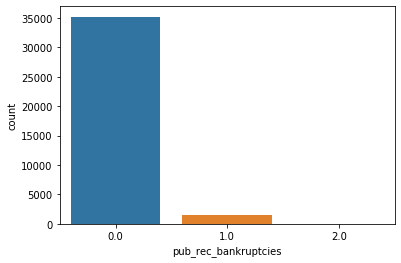

In [711]:
sns.countplot(data.pub_rec_bankruptcies)

**Observations**:<br>
99% people have not went bankrupt.

<hr>

## Categorical Variables

### Loan issue date (issue_d)

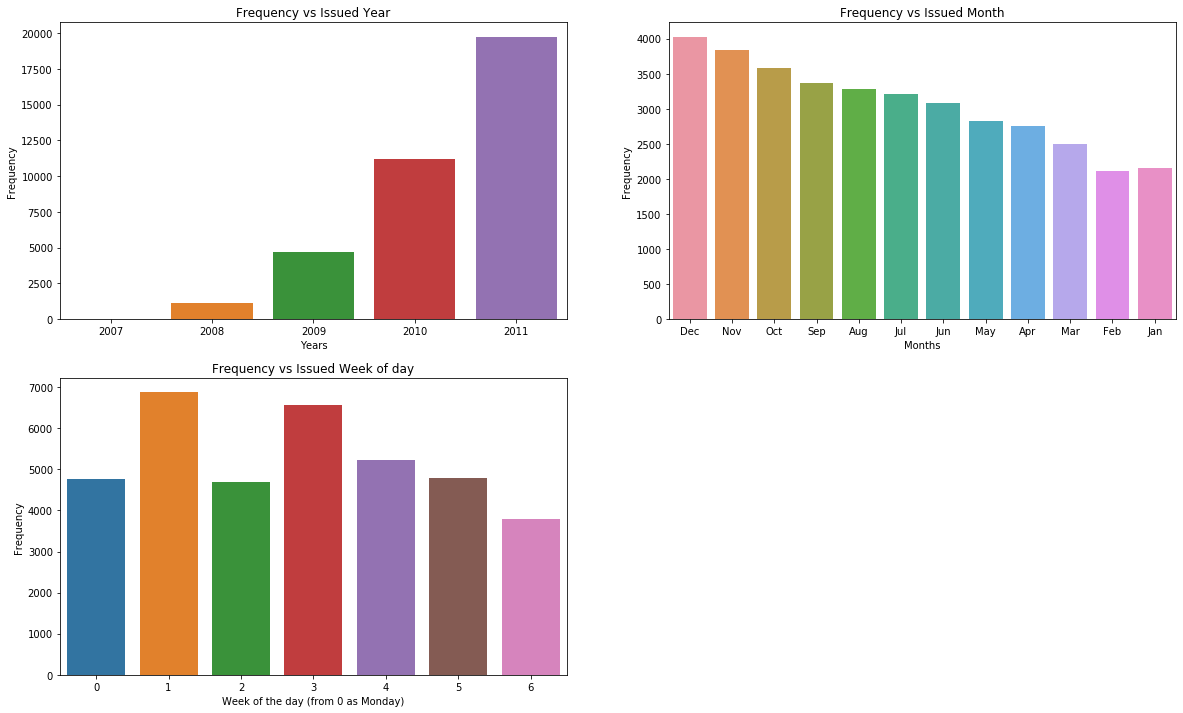

In [712]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data.issue_d_year)
plt.title('Frequency vs Issued Year')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.countplot(data.issue_d_month)
plt.title('Frequency vs Issued Month')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
sns.countplot(data.issue_d_weekday)
plt.title('Frequency vs Issued Week of day')
plt.xlabel('Week of the day (from 0 as Monday)')
plt.ylabel('Frequency')
plt.show()

**Observations**:<br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

### Erliest Credit line (earliest_cr_line)

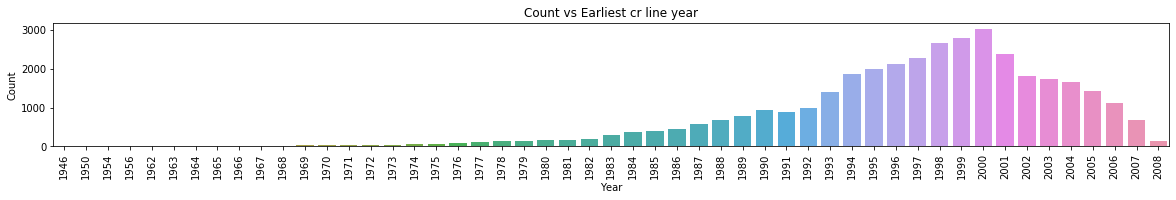

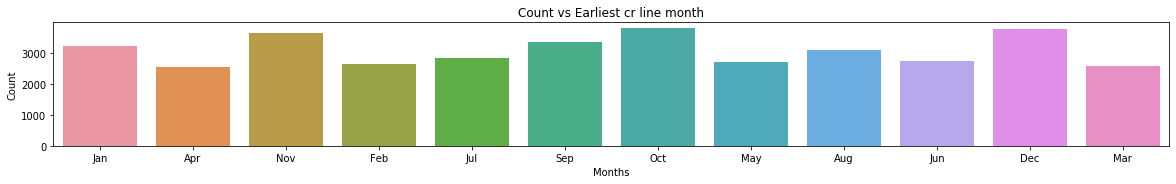

In [713]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
#data.issue_d.groupby(data.earliest_cr_line.dt.year).count().plot.bar()
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Observations**:  
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Term

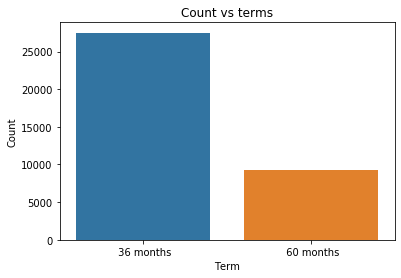

In [715]:
sns.countplot(data.term)
plt.title('Count vs terms')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

**Observations**:<br>
Barrowrs have taken 36 months tenure more than 60 months.


### Grade

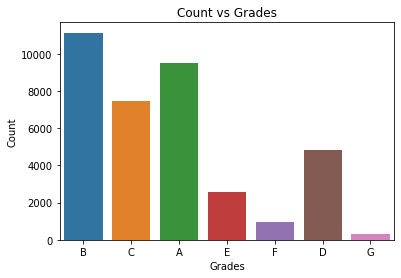

In [719]:
sns.countplot(data.grade)
plt.title('Count vs Grades')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

**Conclusions**: <br>
Most borrowers fall under A and B grades then other grades

###  Sub Grade

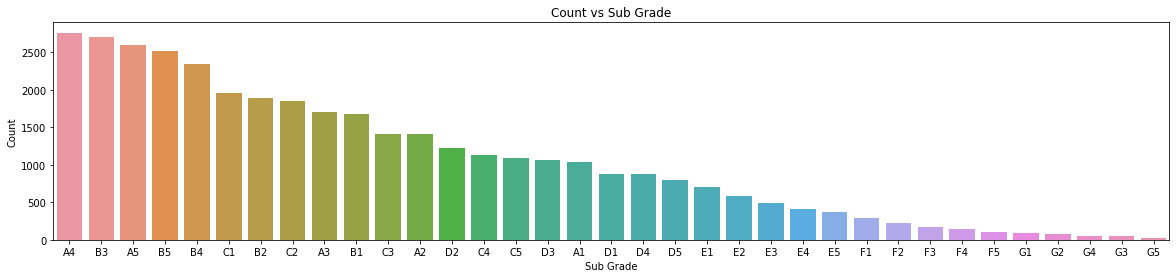

In [720]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length

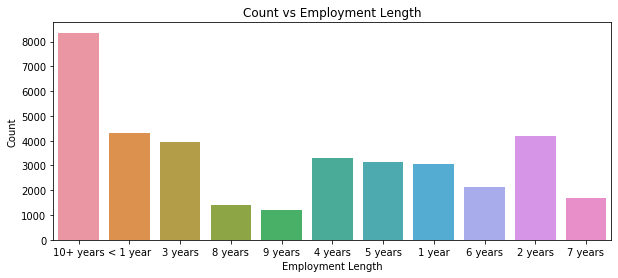

In [721]:
plt.figure(figsize=(10,4))
sns.countplot(data.emp_length)
plt.title('Count vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.show()

**Conclusion**:<br>
Borrowers are mostly 10+ years emploment length.

### Home Ownership

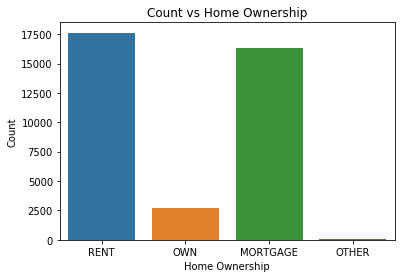

In [722]:
sns.countplot(data.home_ownership)
plt.title('Count vs Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

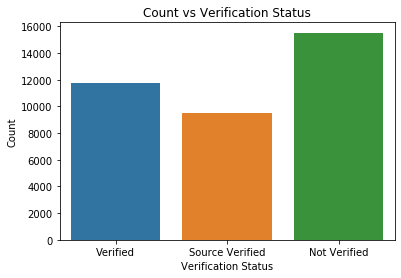

In [723]:
sns.countplot(data.verification_status)
plt.title('Count vs Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Majority of loans were given without verification of applicants income.

### Loan Status

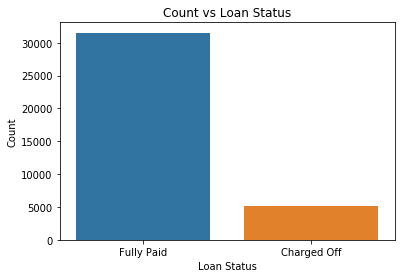

In [724]:
sns.countplot(data.loan_status)
plt.title('Count vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [725]:
data.loan_status.value_counts()*100/data.loan_status.count()

Fully Paid    85.84
Charged Off   14.16
Name: loan_status, dtype: float64

**Conclusions**:<br>
85% of borrowers has paid the loan fully. where are 14% are defaulted the loan.

### Purpose

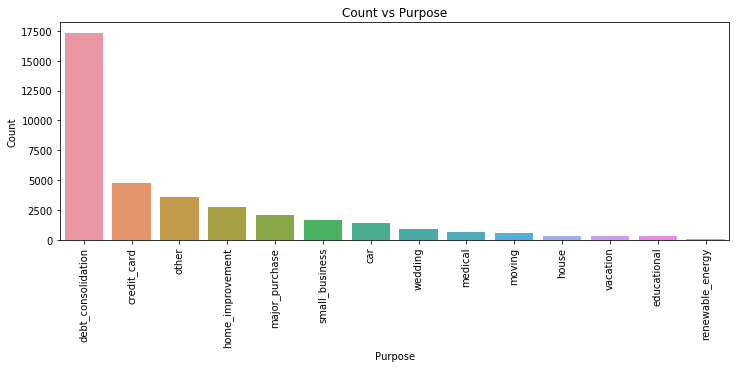

In [726]:
plt.figure(figsize=(12,4))
sns.countplot(data.purpose, order=data.purpose.value_counts().index)
plt.xticks(rotation=90)
plt.title('Count vs Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_

### Borrower's State (add_state)

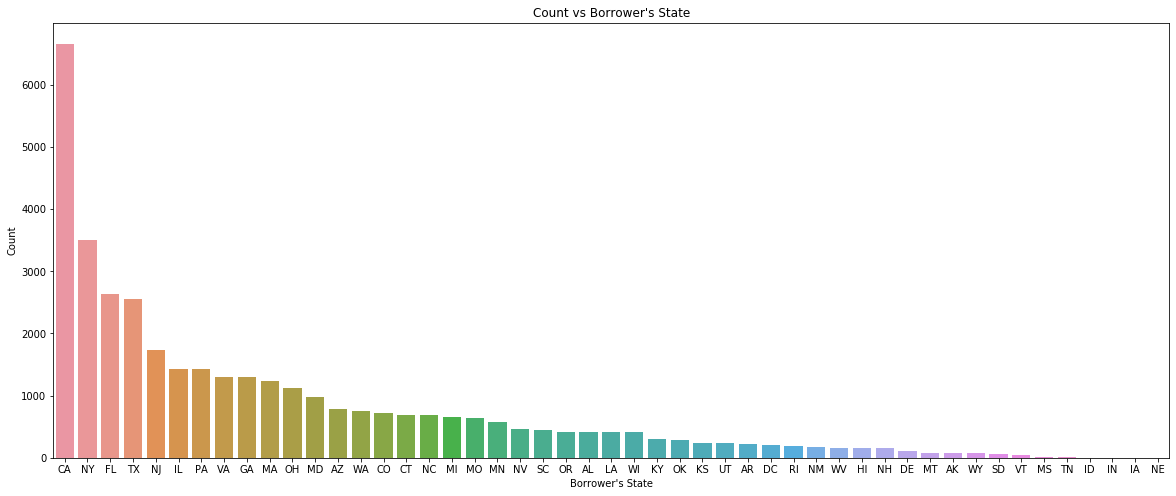

In [727]:
plt.figure(figsize=(20,8))
sns.countplot(data.addr_state, order=data.addr_state.value_counts().index)
plt.title('Count vs Borrower\'s State')
plt.xlabel('Borrower\'s State')
plt.ylabel('Count')
plt.show()

**Conclusions**:<br>
Most of the borrowers are from _CA_ and _NY_

<hr>

## Segmented Univariate Analysis

### Loan Amount

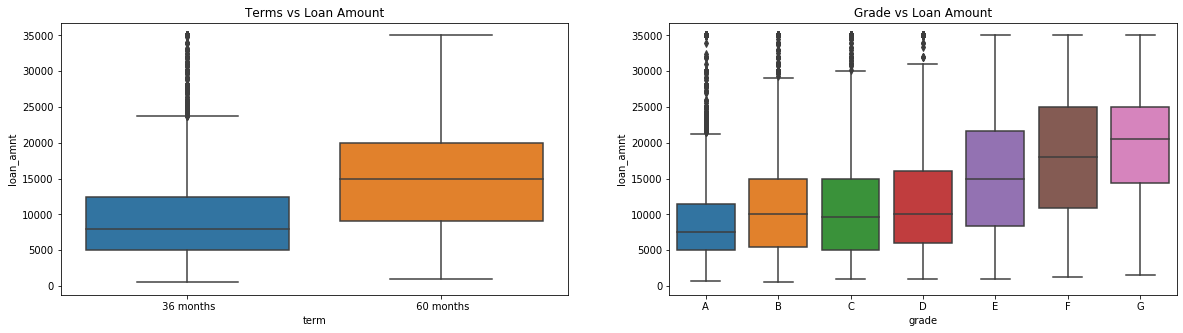

In [728]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

**Conclusions**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

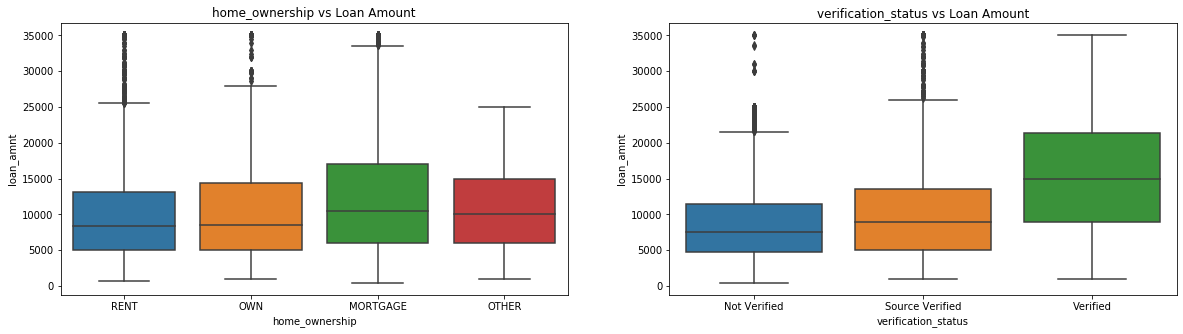

In [729]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

**Conclusion**:<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

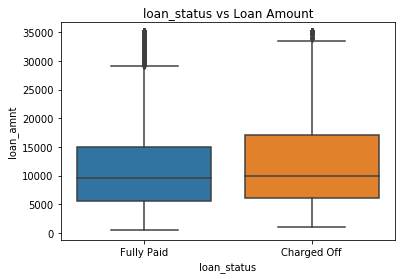

In [101]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

**Conclusion**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

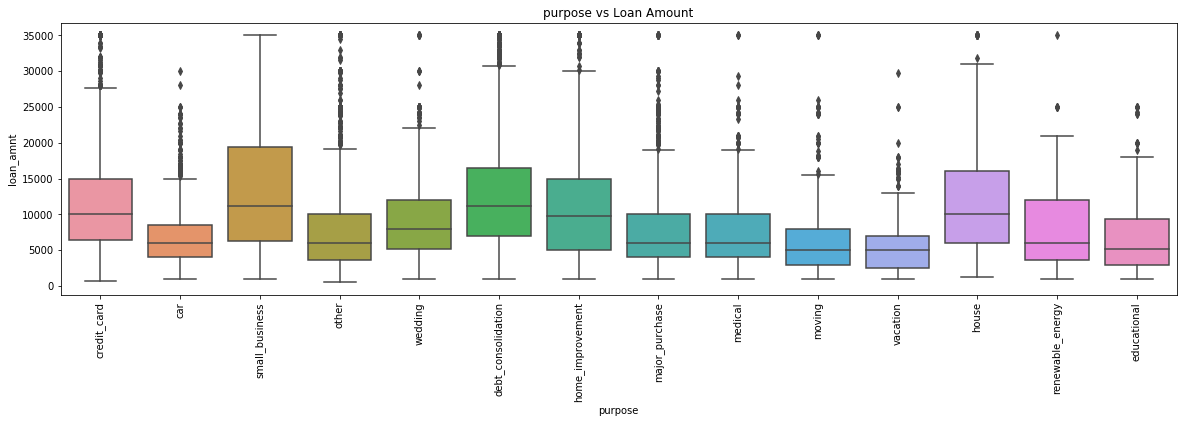

In [732]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

**Observations**:  
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

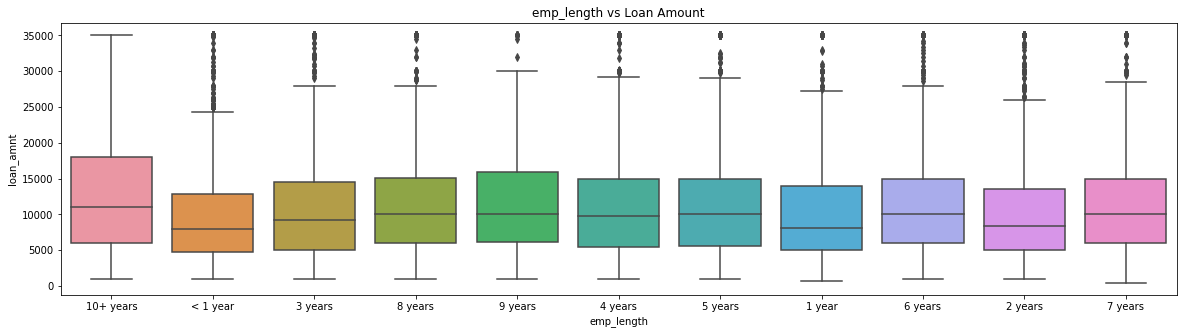

In [733]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

**Observations**:  
more borrowers are from 10+ years and least is <1 year

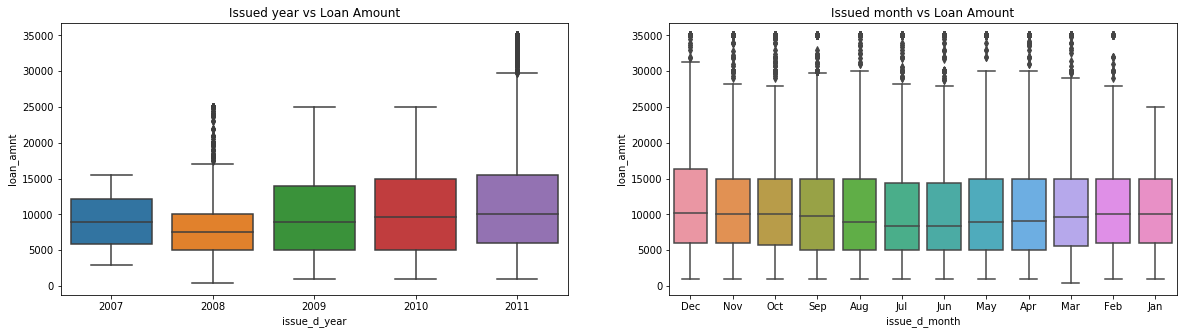

In [734]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

**Conclusion**:<br>
The meadian loan amount in each year did not change much but the distribution is more spread as the years increase,  
which means people have taken different loan amounts in each year.  
Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.


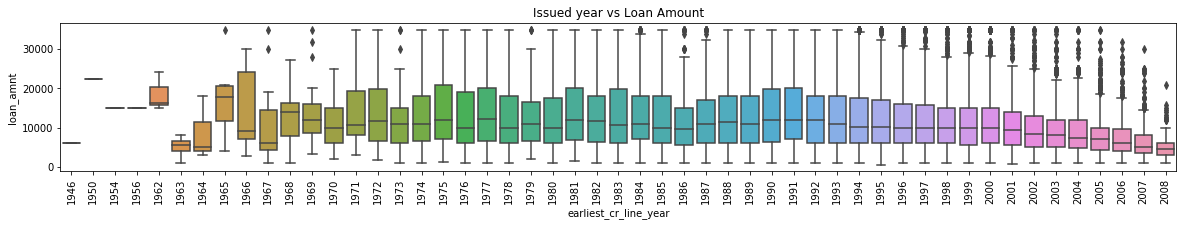

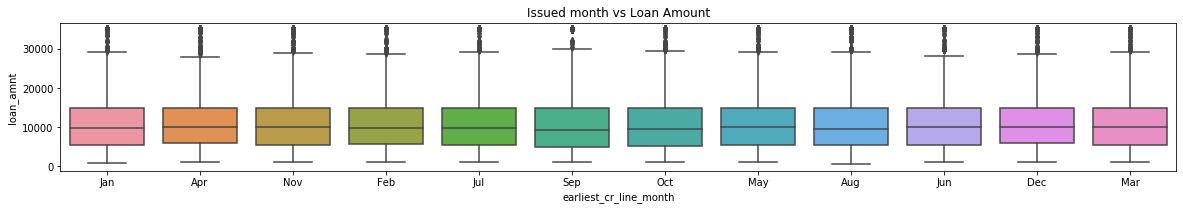

In [735]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

**Conclusions**:<br>
Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

### funded_amnt

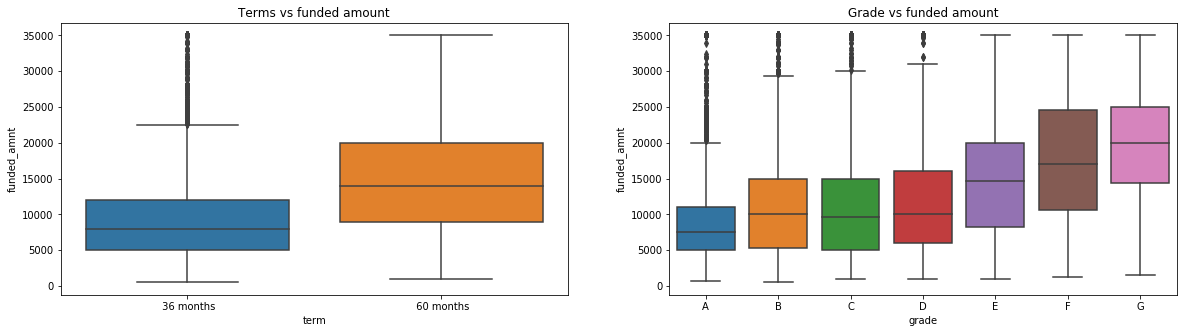

In [736]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

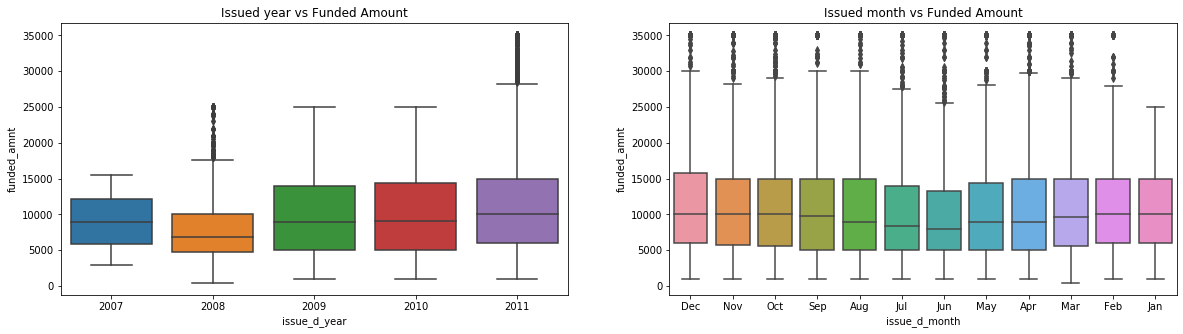

In [107]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

Text(0.5, 1.0, 'loan_status vs Funded amnt')

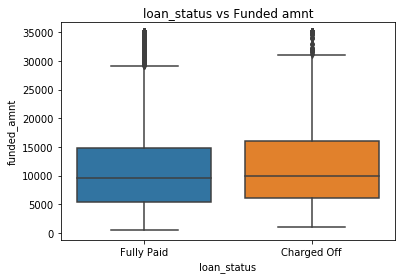

In [108]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

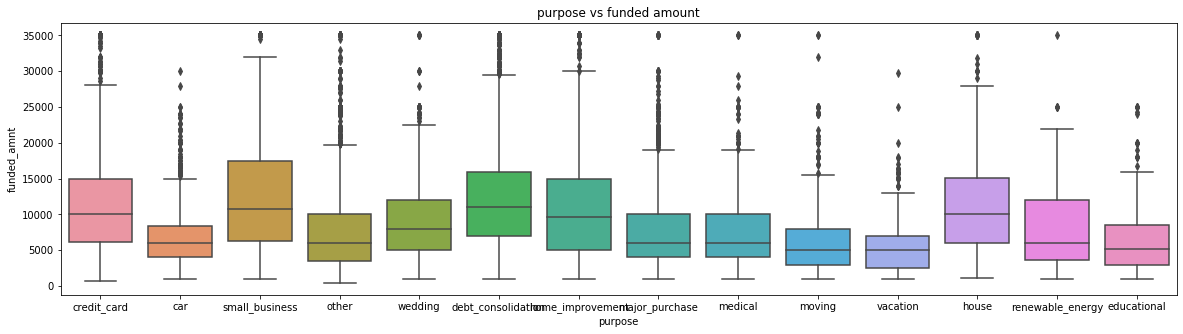

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

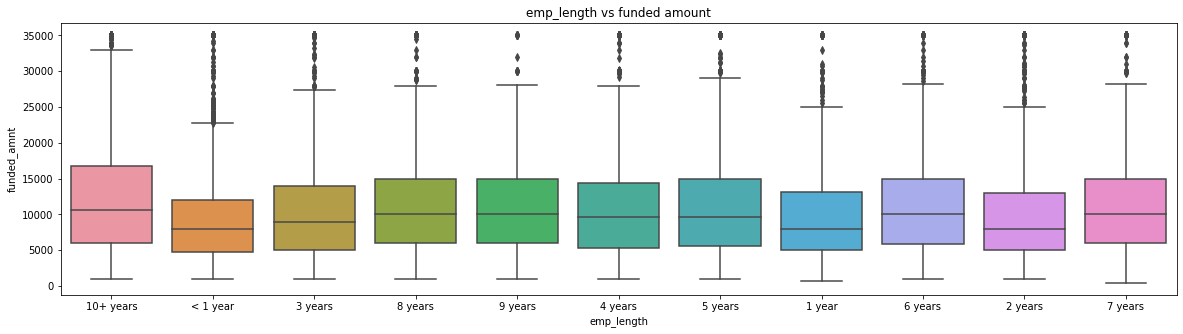

In [110]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

**Conclusions**:<br>
The Funded Amount has similar observations as Loan Amount.

### int_rate

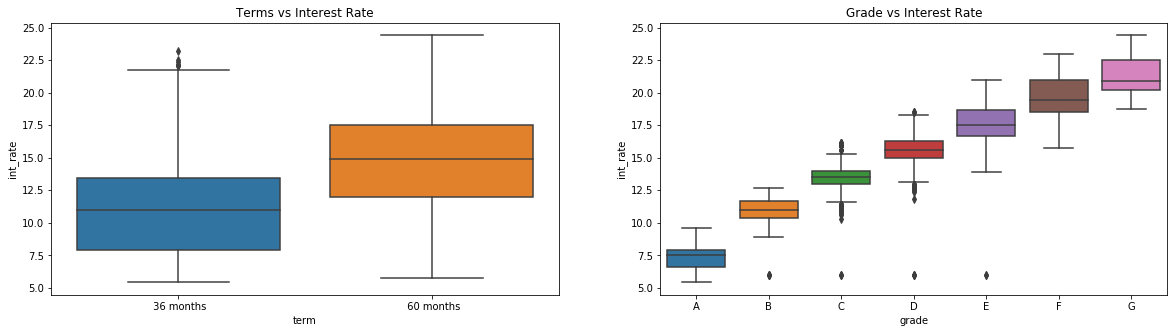

In [737]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Terms vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

**Observation**:  
The interest rates are higher for Higher tenure loans.  
And Also Interest Rates are Higher as Grades are Lowering (A to G).

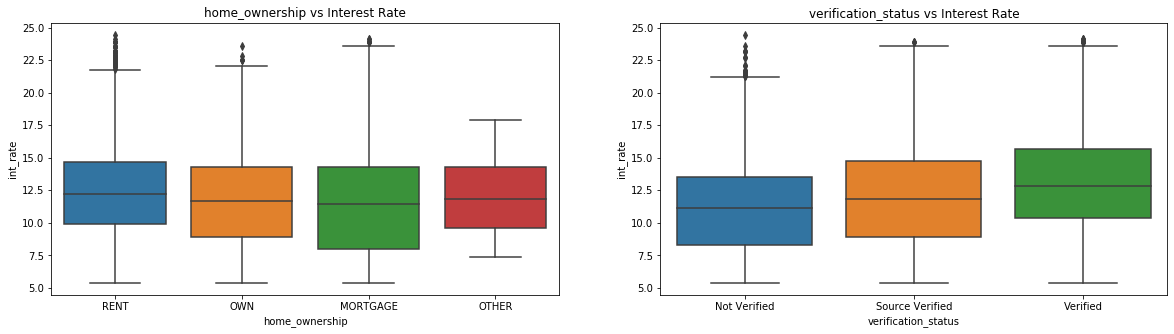

In [738]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

**Observations**:  
Barrowers with Own and Mortgage got loans with less interest rates as the security will be there.  
And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

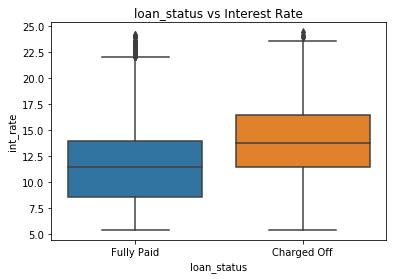

In [739]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

**Observations**:  
This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

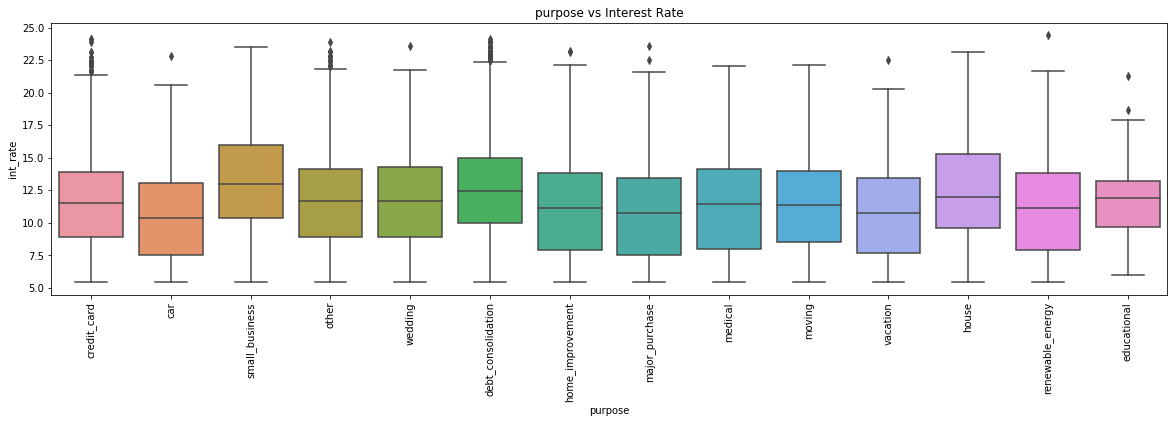

In [740]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

**Observations**:  
Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

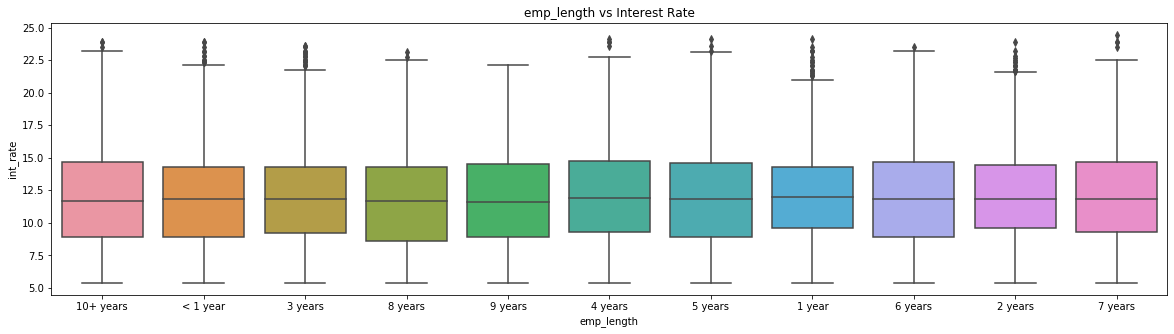

In [115]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')

**Observations**:  
Looks like there is no much relation between Employment length and interest rate.

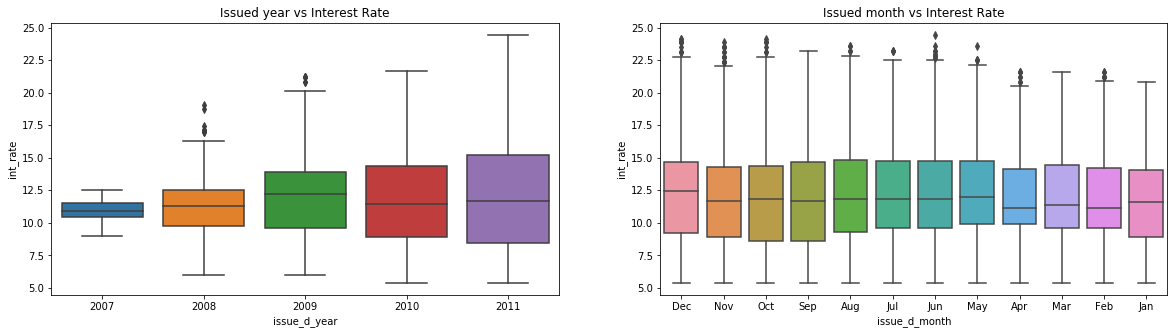

In [116]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

**Observations**:  
As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.  


# installment

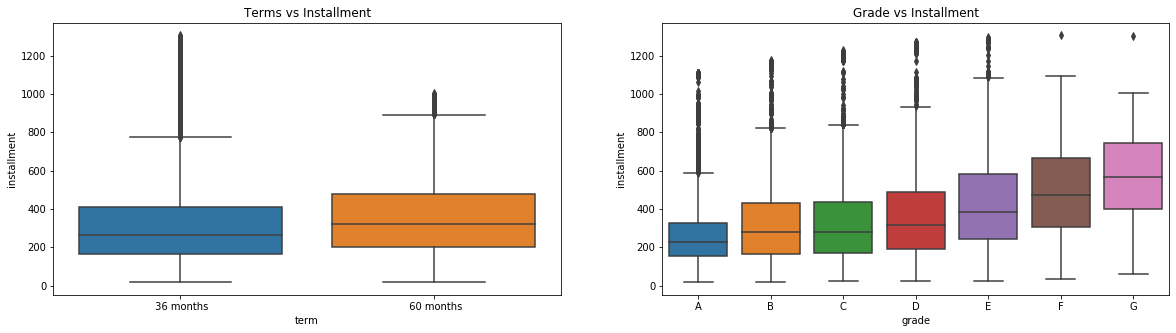

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.installment, data=data)
plt.title('Terms vs Installment')
plt.subplot(122)
plt.title('Grade vs Installment')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.installment, order = grade_ord, data=data)

**Observations**:  
Installment amounts are more for higher tenured loan.  
Installment amount is increasing for lower grades.

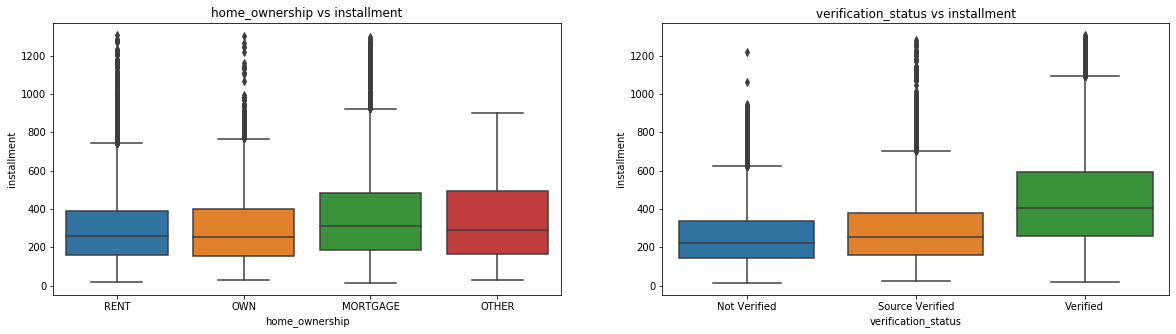

In [746]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.installment, data=data)
plt.title('home_ownership vs installment')
plt.subplot(122)
plt.title('verification_status vs installment')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.installment, order = verification_status_ord, data=data)

**Observations**:  
Mortgage owned and other owned barrowers has high loan installment amount.  
Verified Barrowers has higher installments then others.

Text(0.5, 1.0, 'loan_status vs installment')

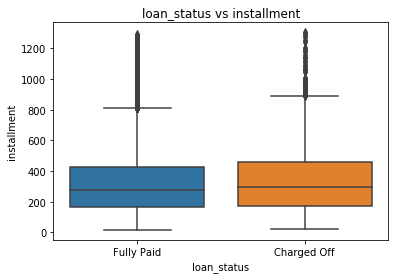

In [119]:
sns.boxplot(x='loan_status', y=data.installment, data=data)
plt.title('loan_status vs installment')

Text(0.5, 1.0, 'purpose vs installment')

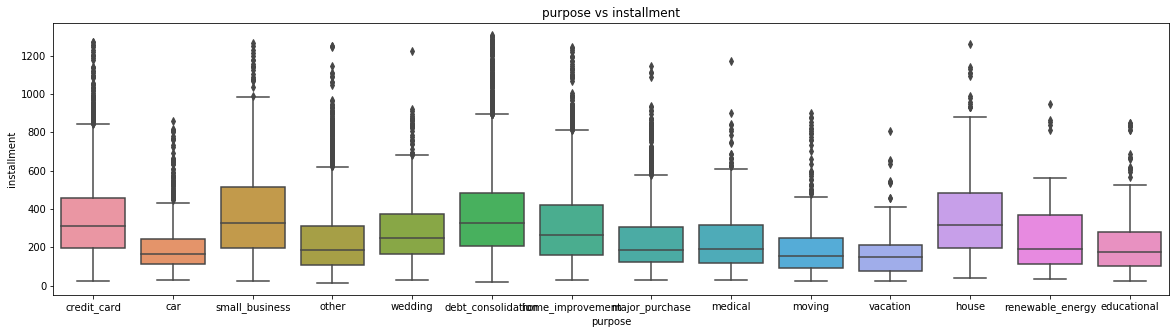

In [120]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.installment, data=data)
plt.title('purpose vs installment')

Text(0.5, 1.0, 'emp_length vs installment')

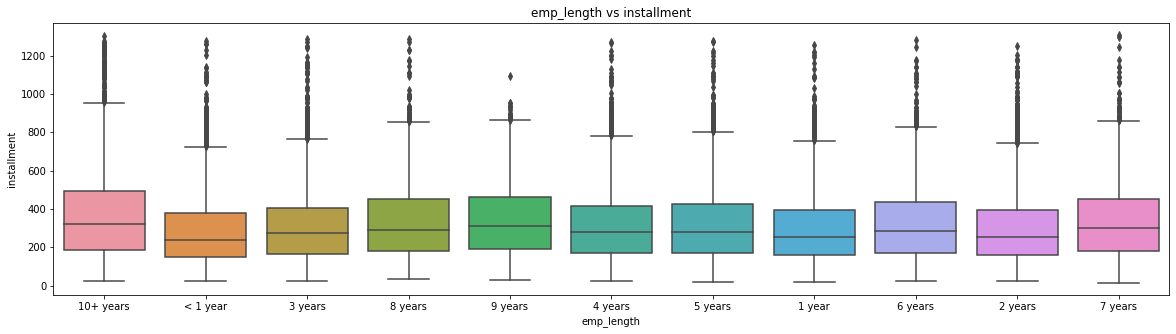

In [121]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.installment, data=data)
plt.title('emp_length vs installment')

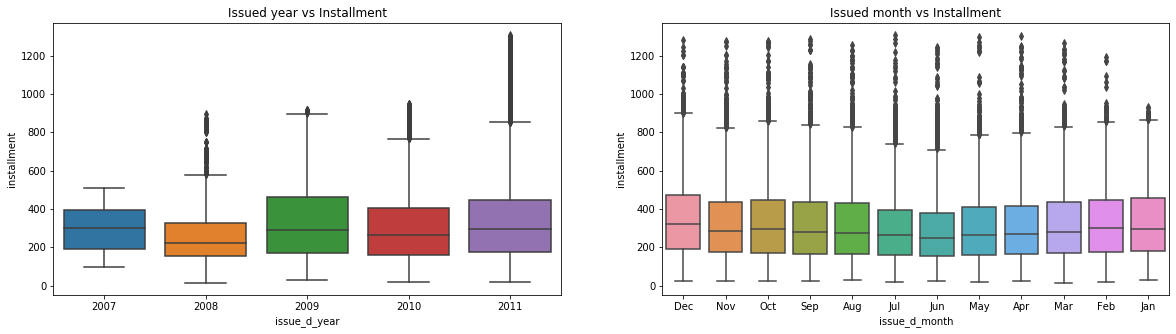

In [122]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.installment, data=data)
plt.title('Issued year vs Installment')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.installment, data=data)
plt.title('Issued month vs Installment')
plt.show()

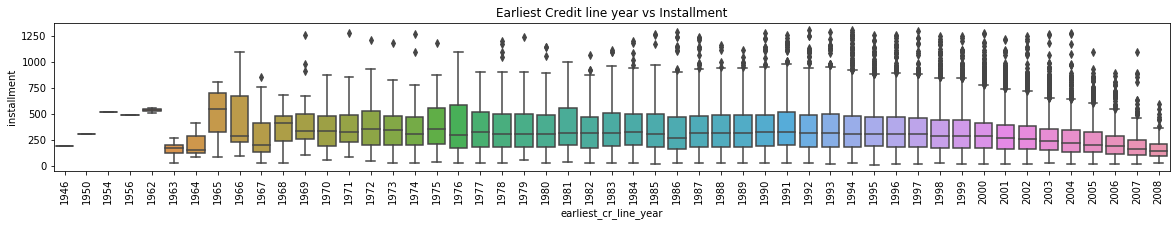

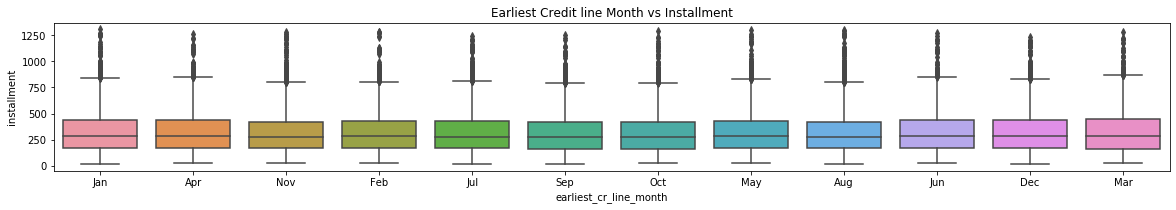

In [123]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.installment, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit line year vs Installment')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.installment, data=data)
plt.title('Earliest Credit line Month vs Installment')
plt.show()

# annual_inc

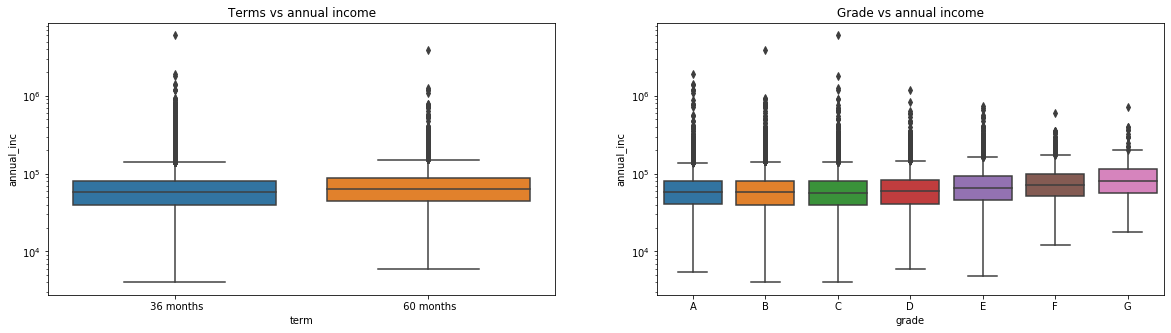

In [124]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

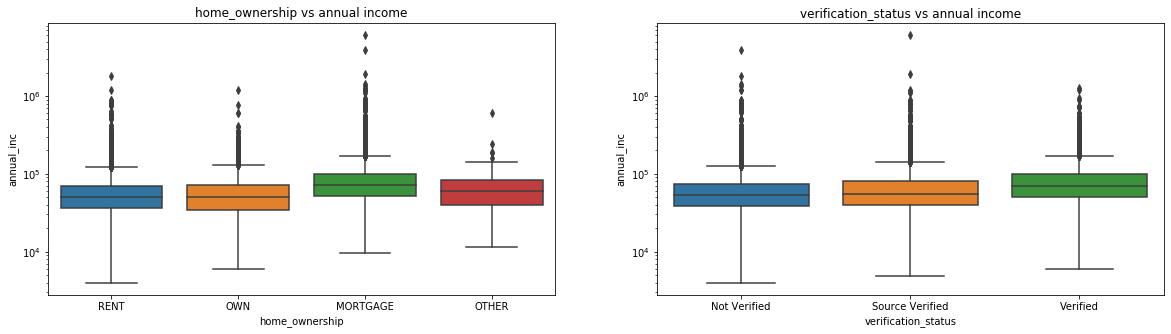

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

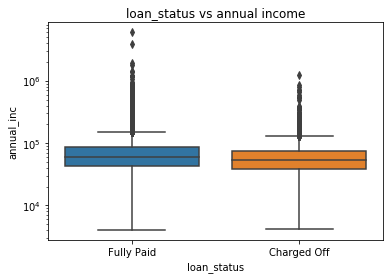

In [126]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

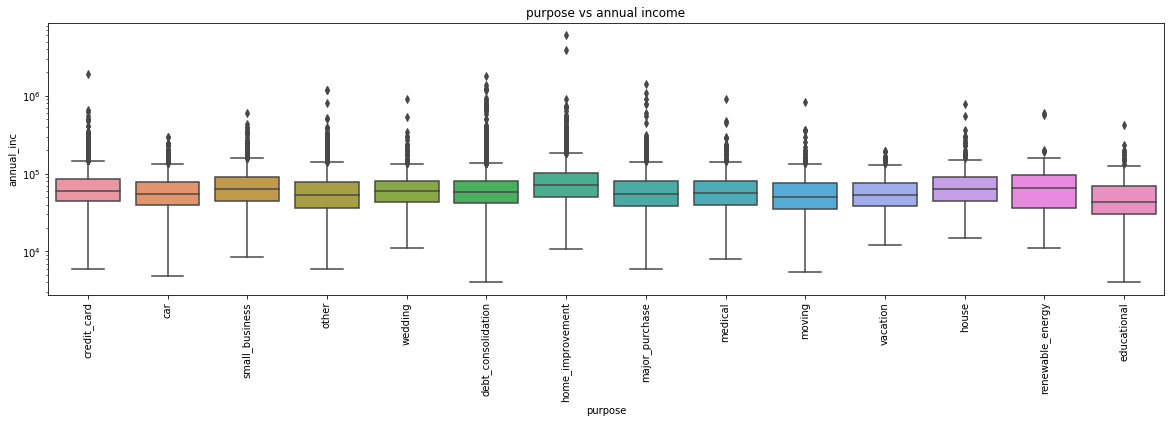

In [127]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

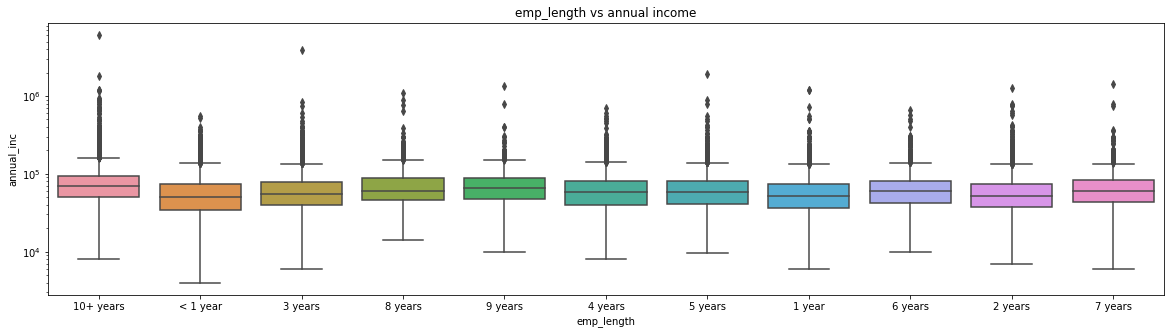

In [128]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('emp_length vs annual income')
plt.yscale('log')

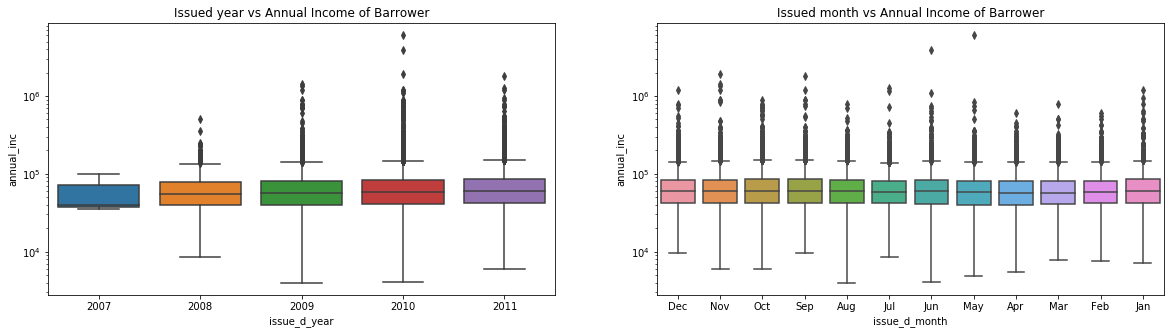

In [129]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

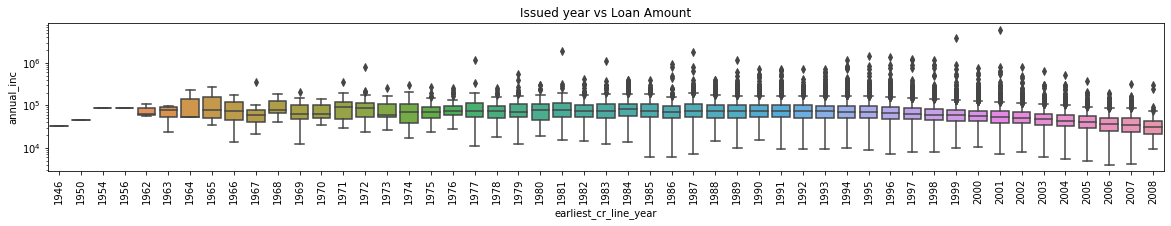

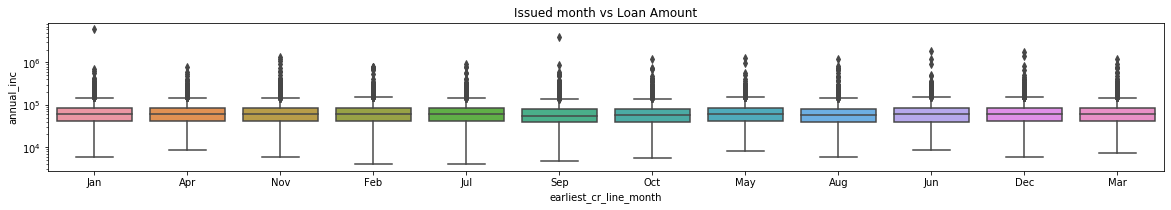

In [130]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

# dti

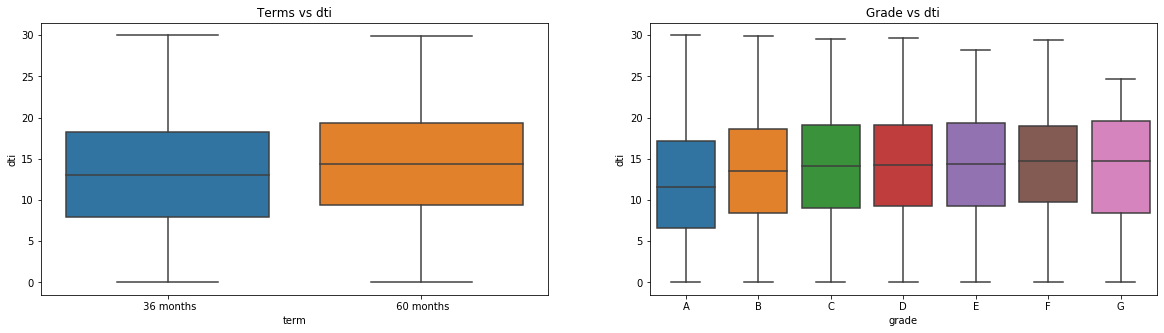

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

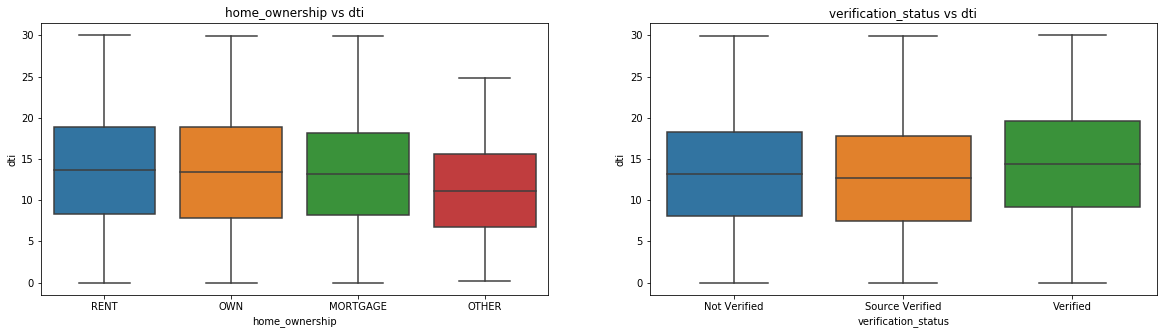

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan_status vs dti')

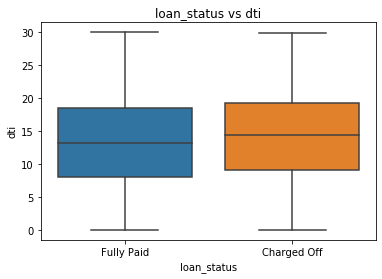

In [133]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

Text(0.5, 1.0, 'purpose vs dti')

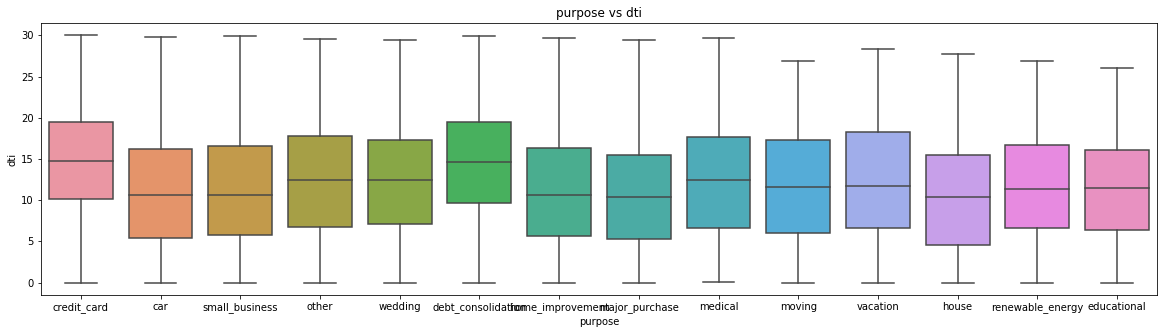

In [134]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.title('purpose vs dti')

Text(0.5, 1.0, 'emp_length vs dti')

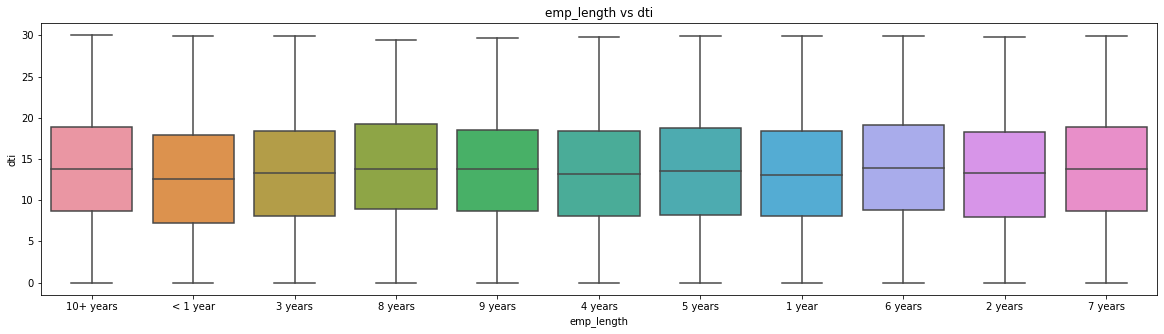

In [135]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

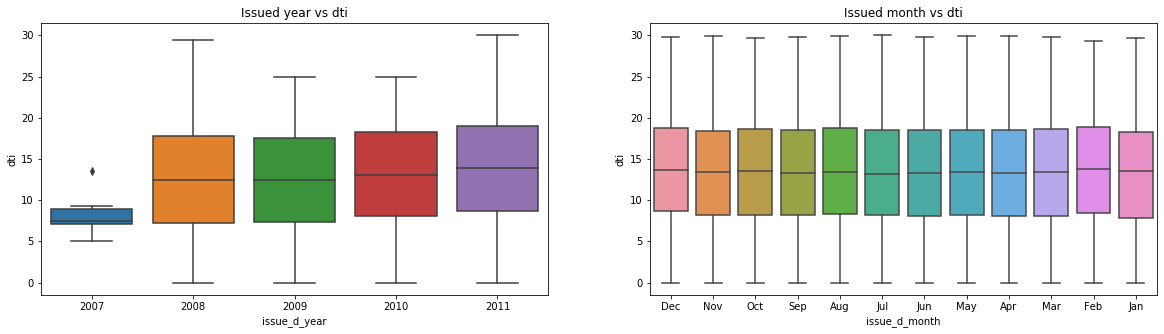

In [136]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.dti, data=data)
plt.title('Issued year vs dti')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.dti, data=data)
plt.title('Issued month vs dti')
plt.show()

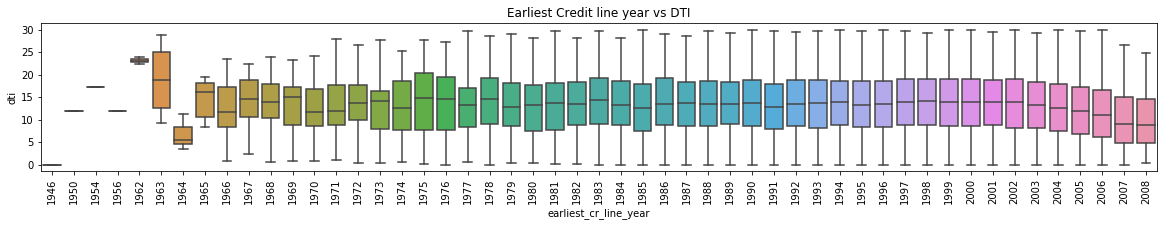

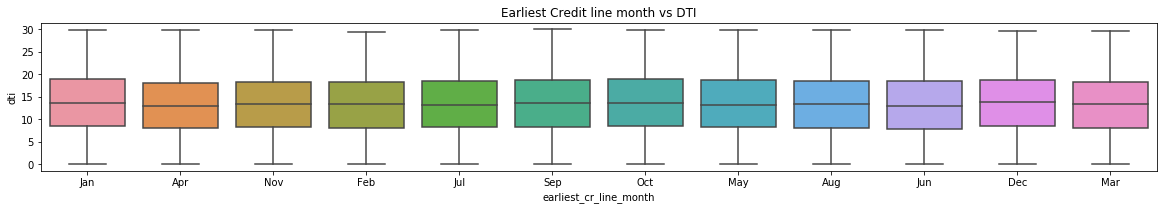

In [137]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit line year vs DTI')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.dti, data=data)
plt.title('Earliest Credit line month vs DTI')
plt.show()

# revol_bal

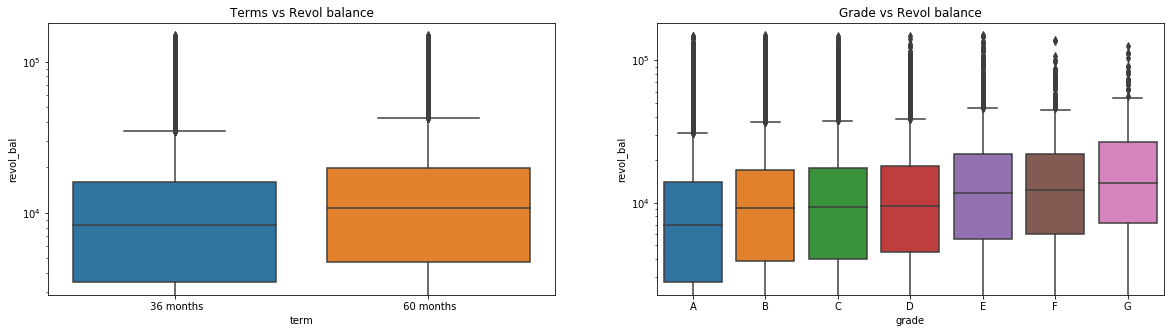

In [138]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.revol_bal, data=data)
plt.title('Terms vs Revol balance')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs Revol balance')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.revol_bal, order = grade_ord, data=data)
plt.yscale('log')

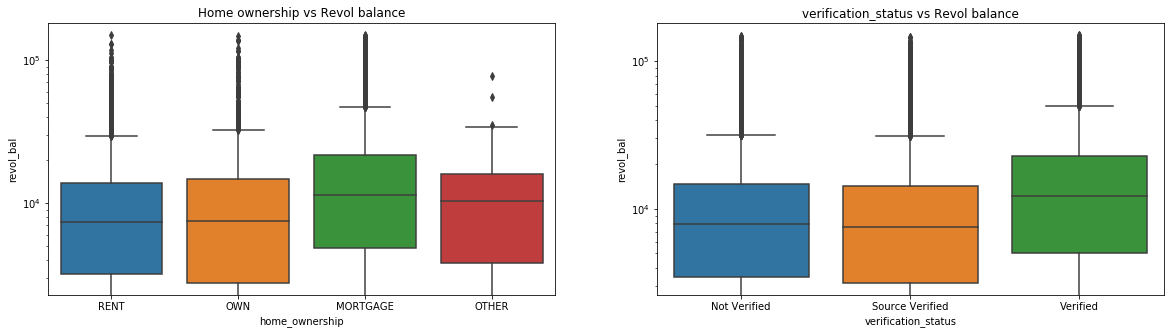

In [139]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.revol_bal, data=data)
plt.title('Home ownership vs Revol balance')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs Revol balance')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.revol_bal, order = verification_status_ord, data=data)
plt.yscale('log')

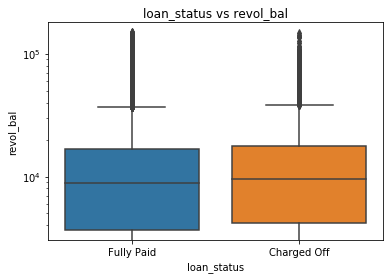

In [140]:
sns.boxplot(x='loan_status', y=data.revol_bal, data=data)
plt.title('loan_status vs revol_bal')
plt.yscale('log')

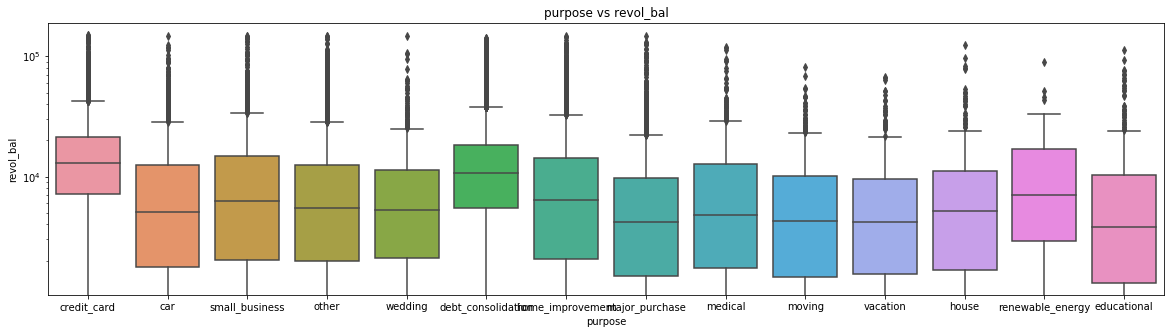

In [141]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.revol_bal, data=data)
plt.title('purpose vs revol_bal')
plt.yscale('log')

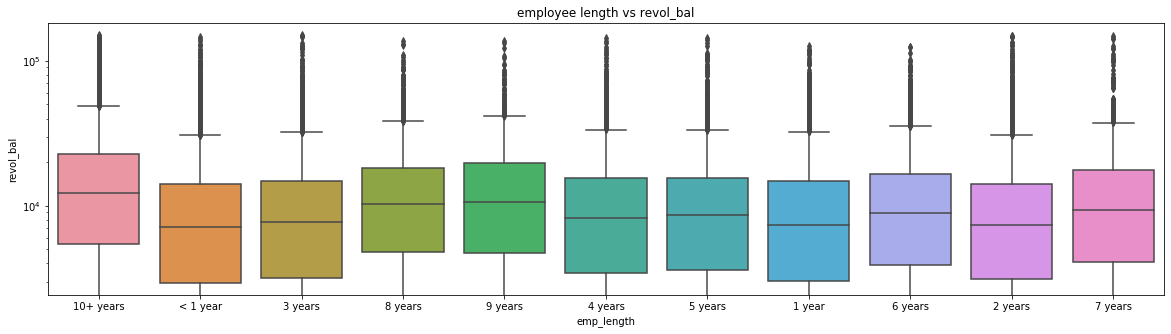

In [142]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.revol_bal, data=data)
plt.title('employee length vs revol_bal')
plt.yscale('log')

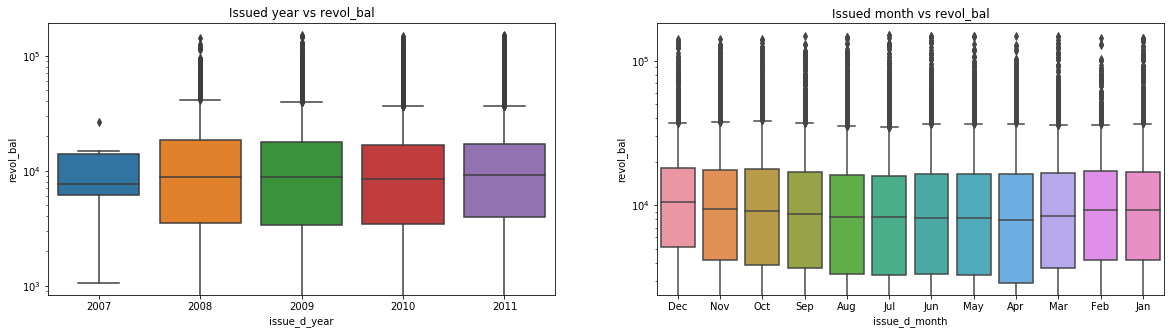

In [143]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.revol_bal, data=data)
plt.title('Issued year vs revol_bal')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.revol_bal, data=data)
plt.title('Issued month vs revol_bal')
plt.yscale('log')
plt.show()

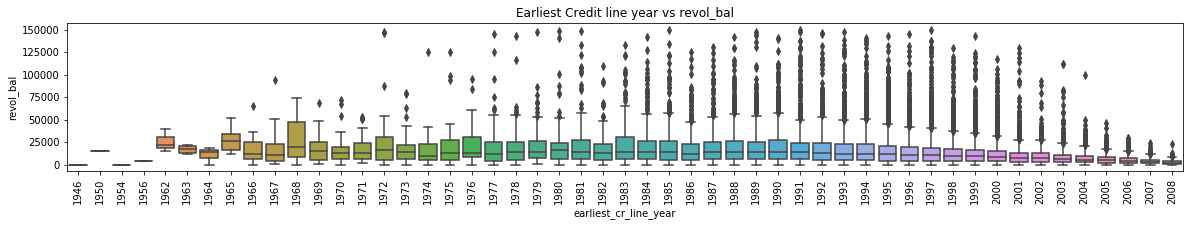

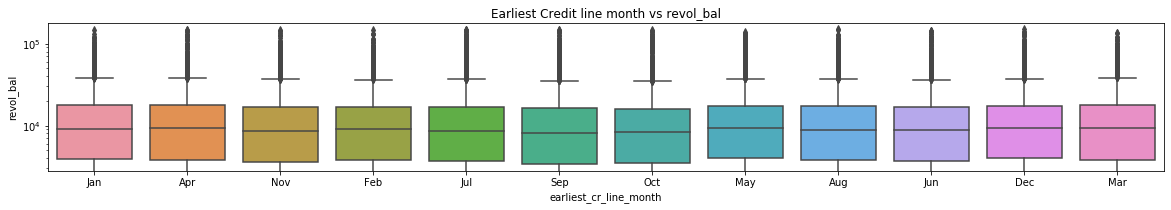

In [144]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.revol_bal, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit line year vs revol_bal')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.revol_bal, data=data)
plt.yscale('log')
plt.title('Earliest Credit line month vs revol_bal')
plt.show()

# revol_util

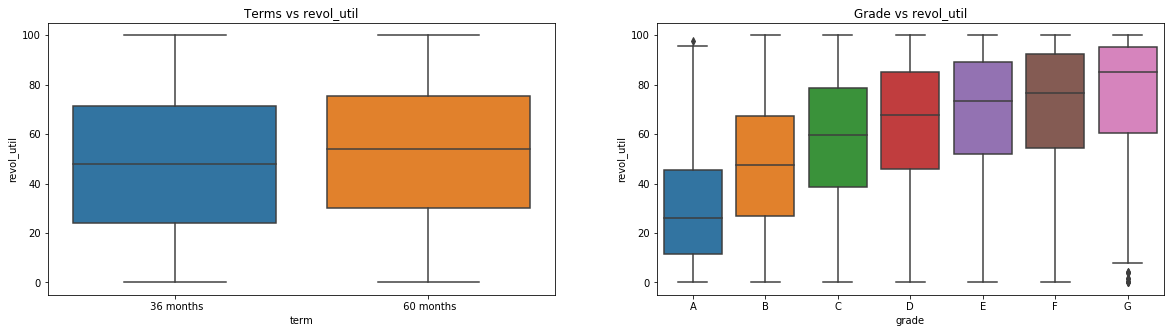

In [145]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.revol_util, data=data)
plt.title('Terms vs revol_util')
plt.subplot(122)
plt.title('Grade vs revol_util')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.revol_util, order = grade_ord, data=data)

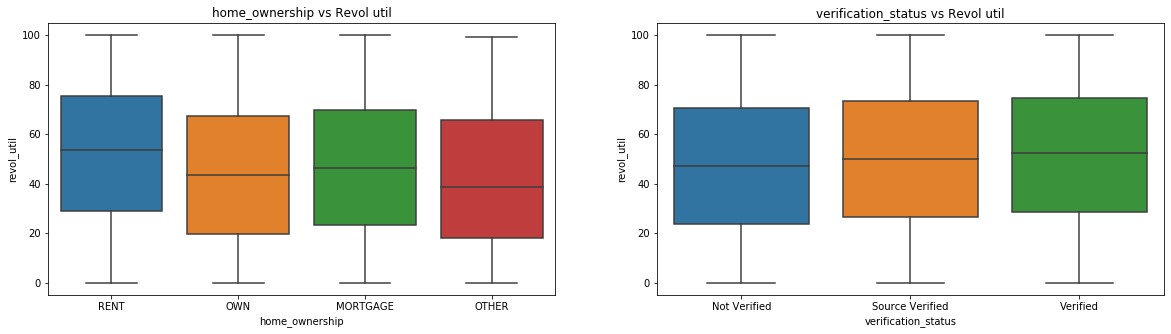

In [146]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.revol_util, data=data)
plt.title('home_ownership vs Revol util')
plt.subplot(122)
plt.title('verification_status vs Revol util')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.revol_util, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan_status vs Revol util')

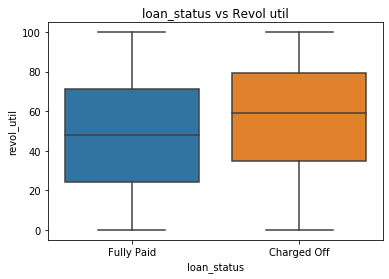

In [147]:
sns.boxplot(x='loan_status', y=data.revol_util, data=data)
plt.title('loan_status vs Revol util')

Text(0.5, 1.0, 'purpose vs Revol util')

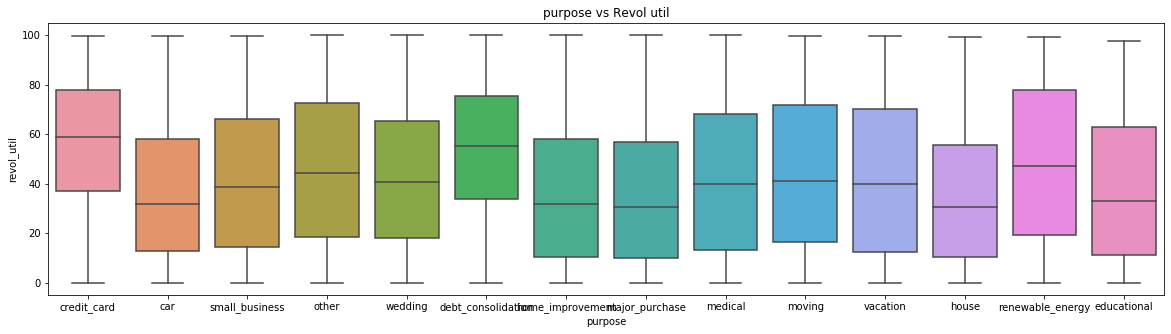

In [148]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.revol_util, data=data)
plt.title('purpose vs Revol util')

Text(0.5, 1.0, 'emp_length vs Revol util')

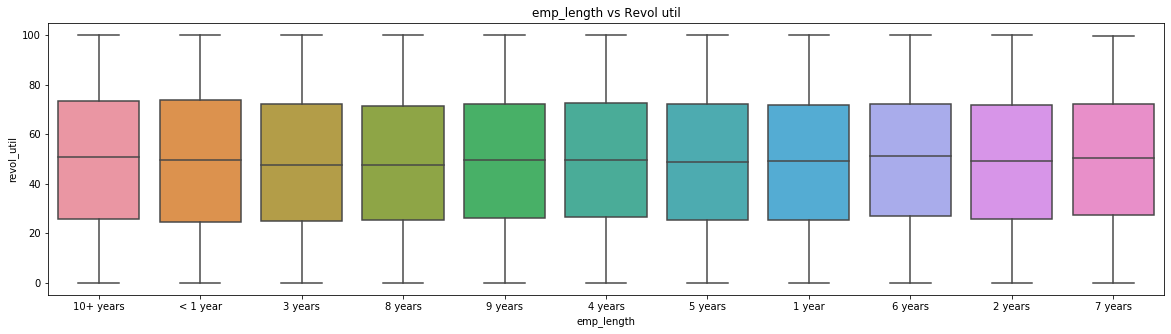

In [149]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.revol_util, data=data)
plt.title('emp_length vs Revol util')

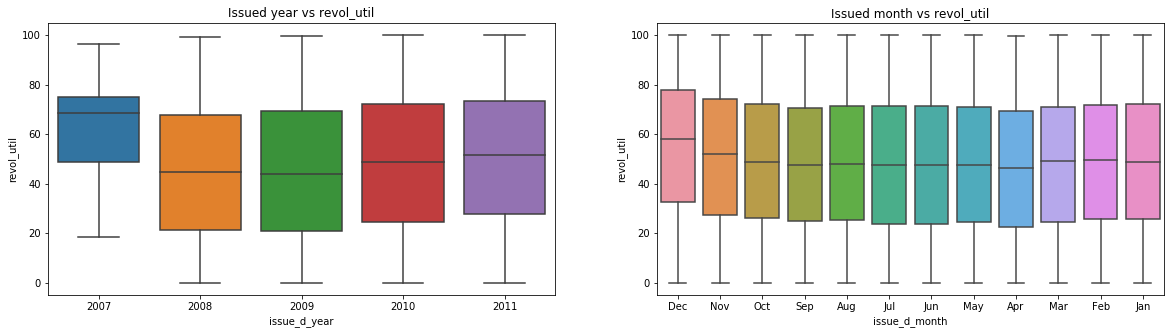

In [150]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.revol_util, data=data)
plt.title('Issued year vs revol_util')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.revol_util, data=data)
plt.title('Issued month vs revol_util')
plt.show()

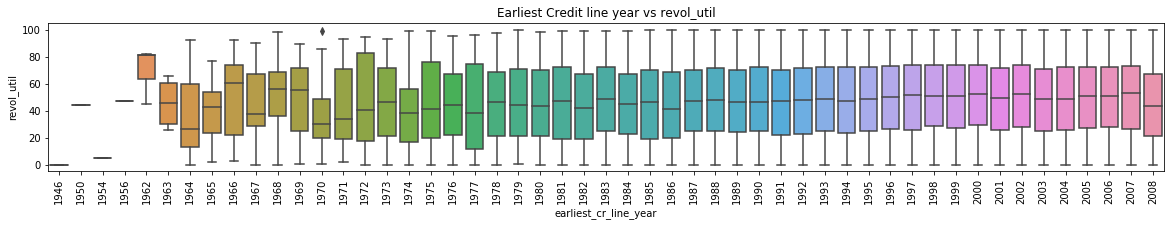

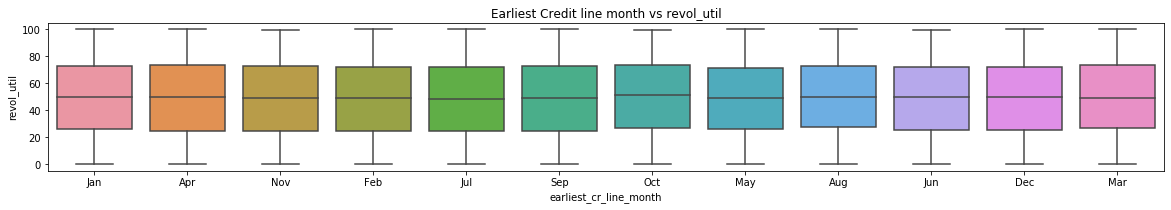

In [151]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.revol_util, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit line year vs revol_util')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.revol_util, data=data)
plt.title('Earliest Credit line month vs revol_util')
plt.show()

# total_acc

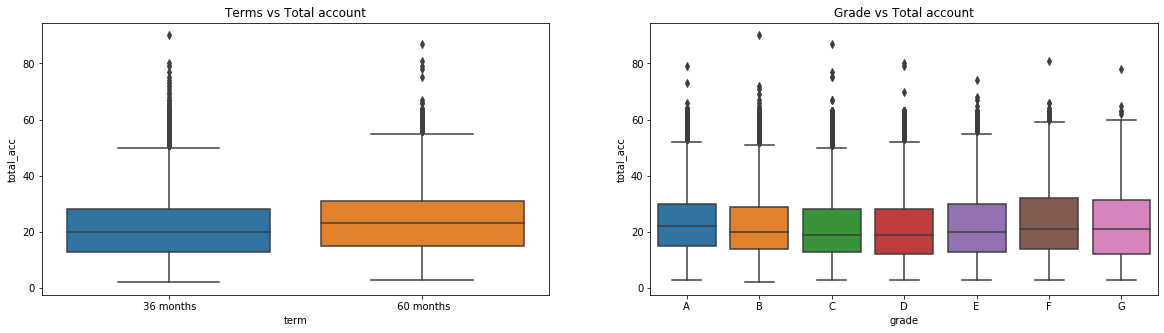

In [152]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.total_acc, data=data)
plt.title('Terms vs Total account')
plt.subplot(122)
plt.title('Grade vs Total account')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.total_acc, order = grade_ord, data=data)

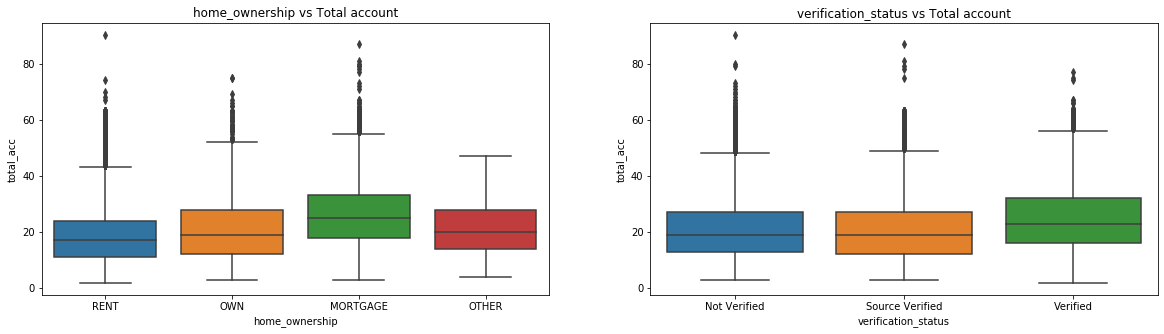

In [153]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.total_acc, data=data)
plt.title('home_ownership vs Total account')
plt.subplot(122)
plt.title('verification_status vs Total account')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.total_acc, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan status vs Total account')

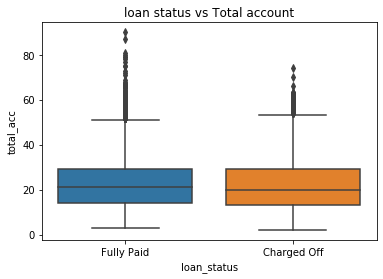

In [154]:
sns.boxplot(x='loan_status', y=data.total_acc, data=data)
plt.title('loan status vs Total account')

Text(0.5, 1.0, 'purpose vs Total account')

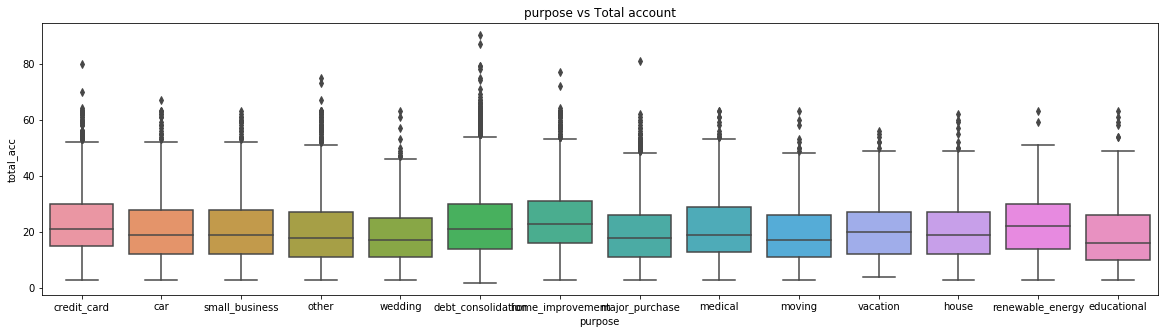

In [155]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.total_acc, data=data)
plt.title('purpose vs Total account')

Text(0.5, 1.0, 'emp_length vs Total account')

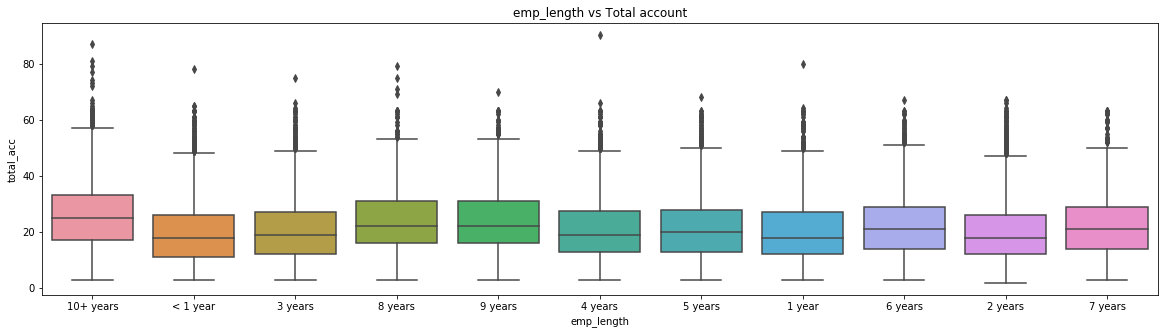

In [156]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.total_acc, data=data)
plt.title('emp_length vs Total account')

# total_pymnt

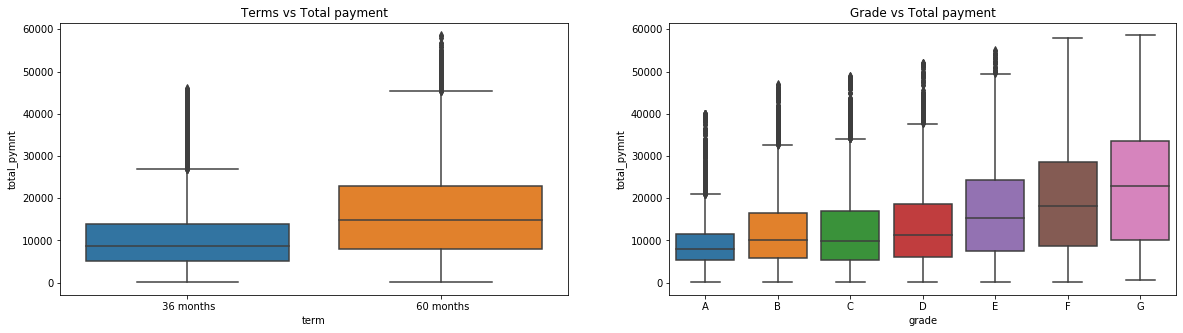

In [157]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.total_pymnt, data=data)
plt.title('Terms vs Total payment')
plt.subplot(122)
plt.title('Grade vs Total payment')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.total_pymnt, order = grade_ord, data=data)

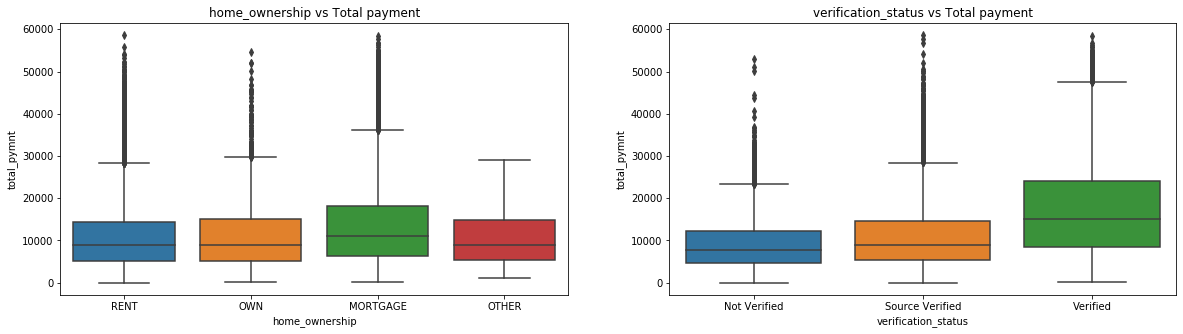

In [158]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.total_pymnt, data=data)
plt.title('home_ownership vs Total payment')
plt.subplot(122)
plt.title('verification_status vs Total payment')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.total_pymnt, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan_status vs Total payment')

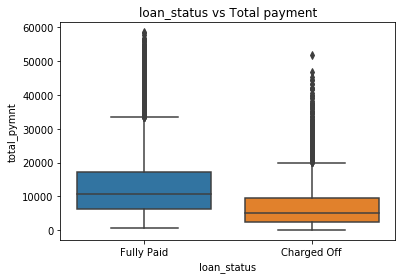

In [159]:
sns.boxplot(x='loan_status', y=data.total_pymnt, data=data)
plt.title('loan_status vs Total payment')

Text(0.5, 1.0, 'purpose vs Total payment')

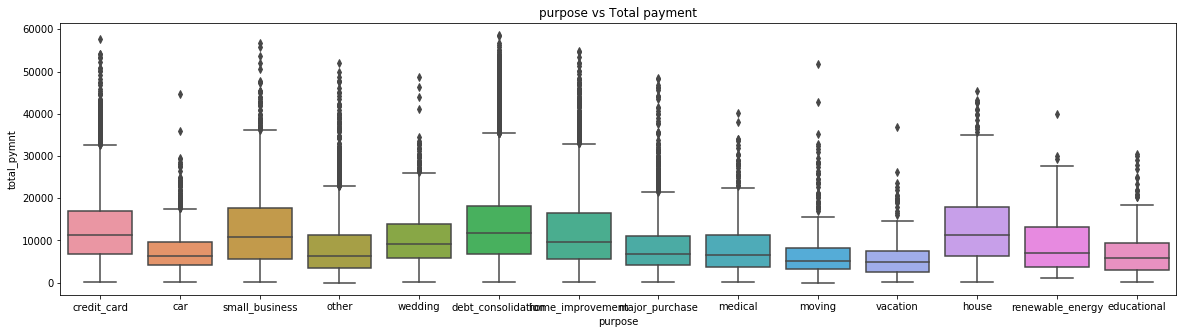

In [160]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.total_pymnt, data=data)
plt.title('purpose vs Total payment')

Text(0.5, 1.0, 'emp_length vs Total payment')

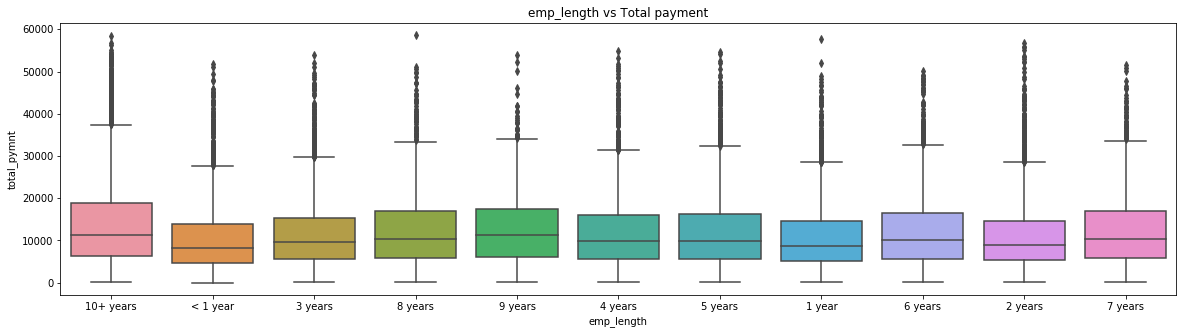

In [161]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.total_pymnt, data=data)
plt.title('emp_length vs Total payment')

# total_pymnt_inv

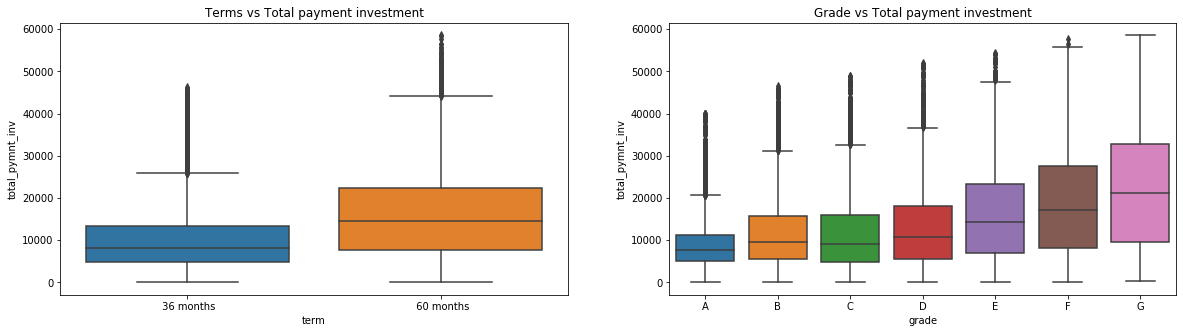

In [162]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.total_pymnt_inv, data=data)
plt.title('Terms vs Total payment investment')
plt.subplot(122)
plt.title('Grade vs Total payment investment')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.total_pymnt_inv, order = grade_ord, data=data)

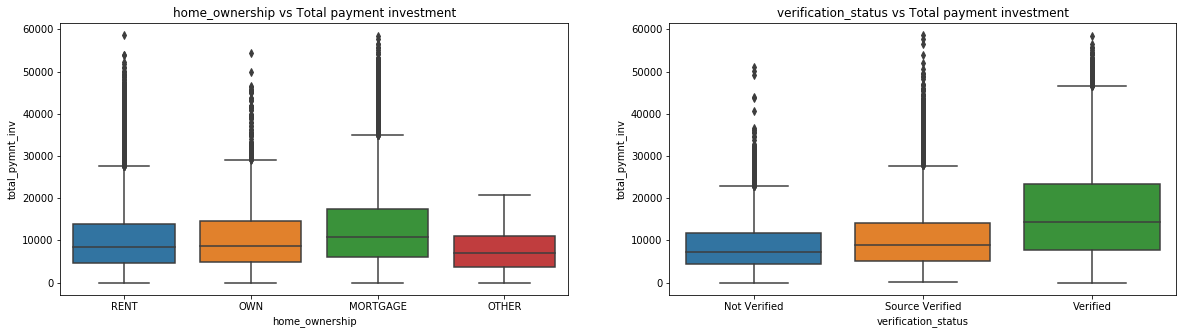

In [163]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.total_pymnt_inv, data=data)
plt.title('home_ownership vs Total payment investment')
plt.subplot(122)
plt.title('verification_status vs Total payment investment')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.total_pymnt_inv, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan_status vs Total payment investment')

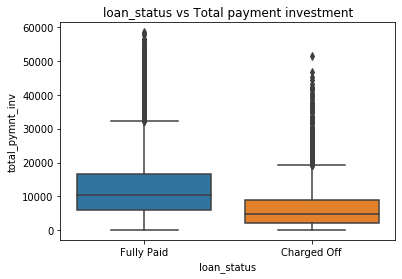

In [164]:
sns.boxplot(x='loan_status', y=data.total_pymnt_inv, data=data)
plt.title('loan_status vs Total payment investment')

Text(0.5, 1.0, 'purpose vs Total payment investment')

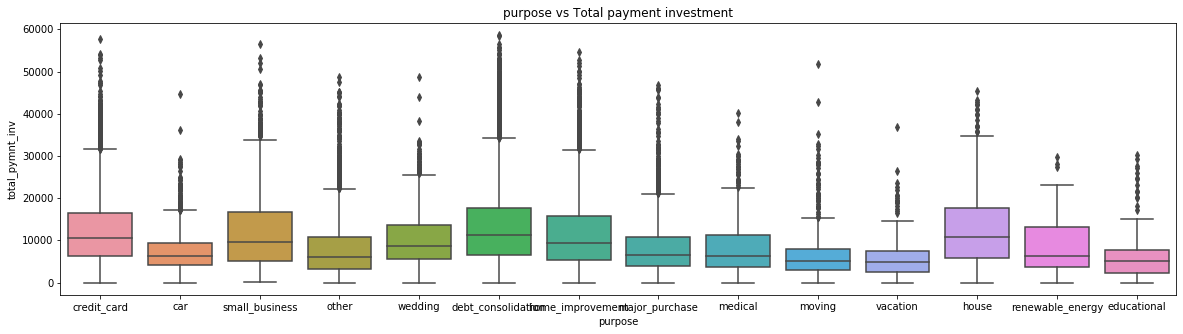

In [165]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.total_pymnt_inv, data=data)
plt.title('purpose vs Total payment investment')

Text(0.5, 1.0, 'emp_length vs Total payment investment')

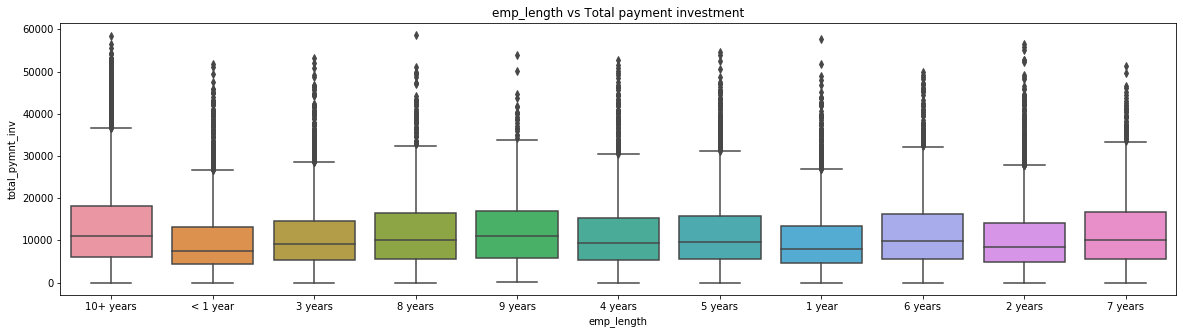

In [166]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.total_pymnt_inv, data=data)
plt.title('emp_length vs Total payment investment')

# last_pymnt_amnt

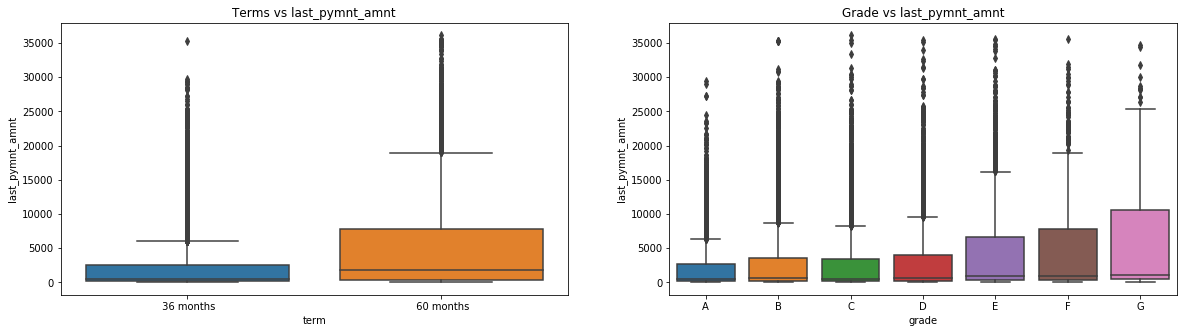

In [743]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.last_pymnt_amnt, data=data)
plt.title('Terms vs last_pymnt_amnt')
plt.subplot(122)
plt.title('Grade vs last_pymnt_amnt')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.last_pymnt_amnt, order = grade_ord, data=data)

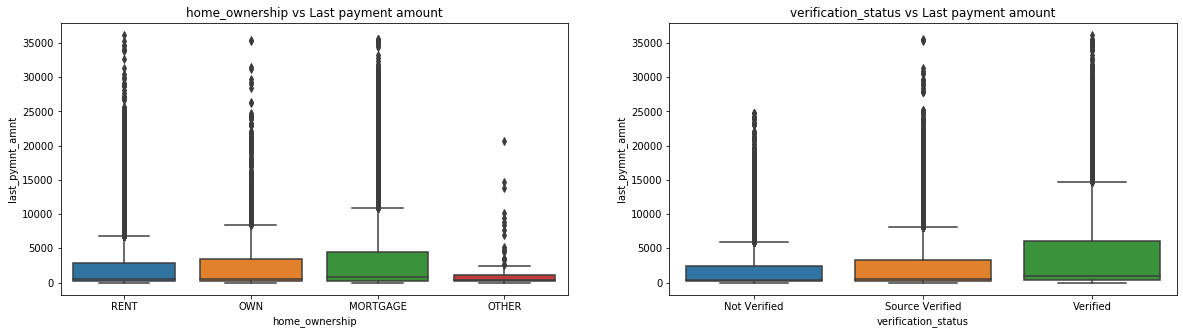

In [188]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.last_pymnt_amnt, data=data)
plt.title('home_ownership vs Last payment amount')
plt.subplot(122)
plt.title('verification_status vs Last payment amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.last_pymnt_amnt, order = verification_status_ord, data=data)

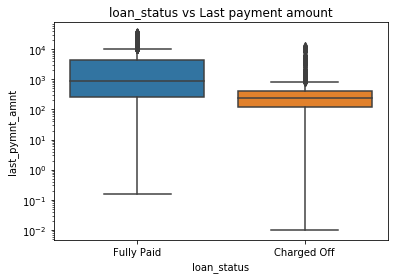

In [189]:
sns.boxplot(x='loan_status', y=data.last_pymnt_amnt, data=data)
plt.title('loan_status vs Last payment amount')
plt.yscale('log')

Text(0.5, 1.0, 'purpose vs Last payment amount')

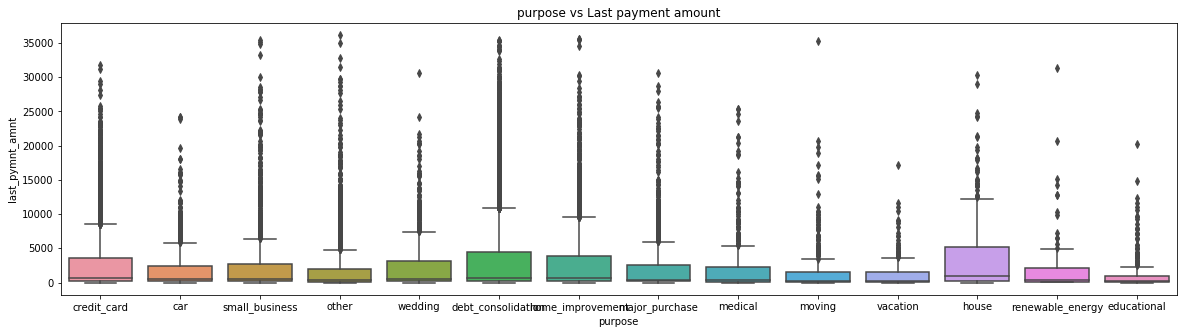

In [190]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.last_pymnt_amnt, data=data)
plt.title('purpose vs Last payment amount')

Text(0.5, 1.0, 'Employee length vs Last payment amount')

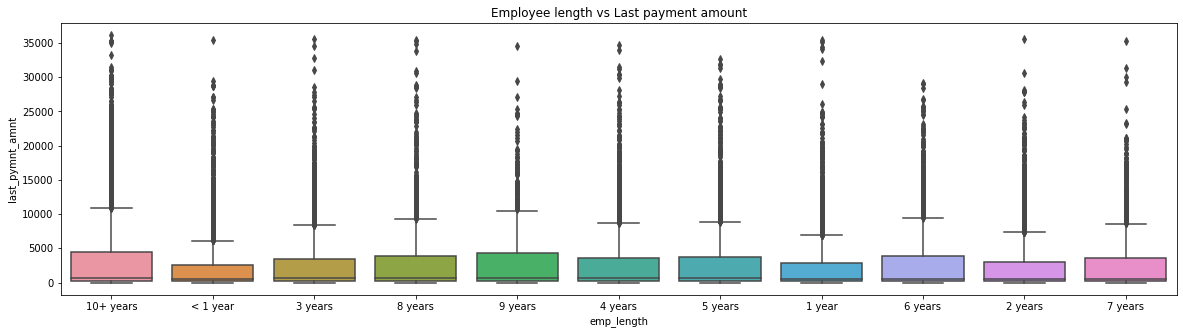

In [191]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.last_pymnt_amnt, data=data)
plt.title('Employee length vs Last payment amount')

### delinq_2yrs

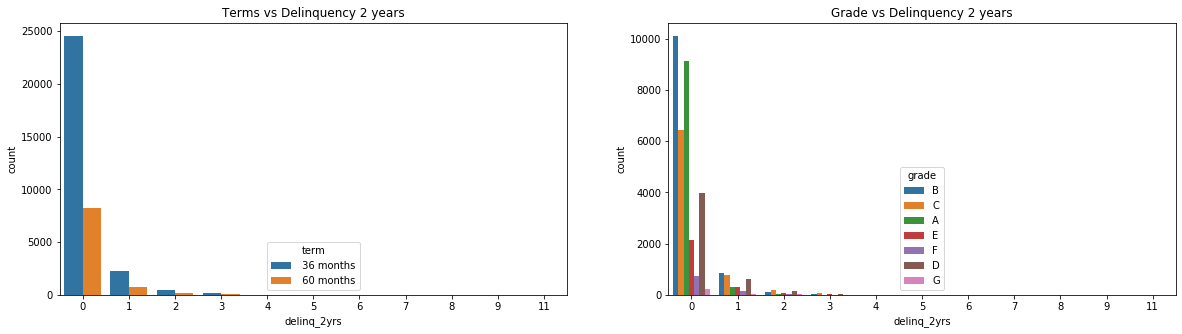

In [229]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.delinq_2yrs, hue='term', data=data)
plt.title('Terms vs Delinquency 2 years')
plt.subplot(122)
plt.title('Grade vs Delinquency 2 years')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.delinq_2yrs, hue='grade', data=data)

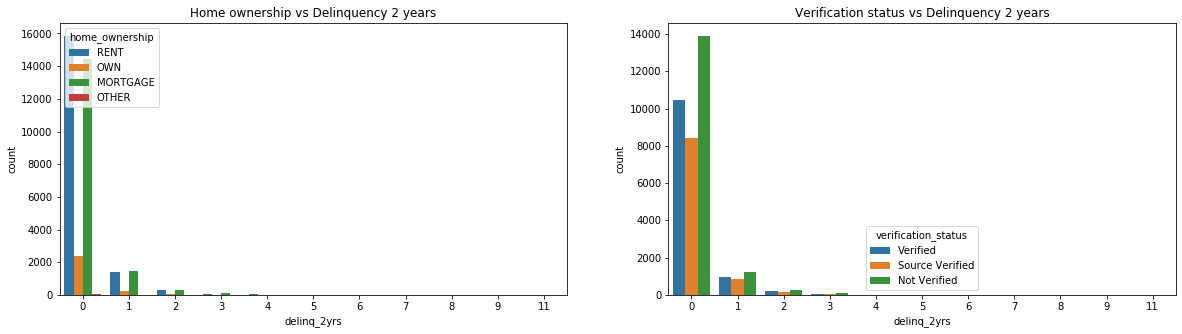

In [230]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.delinq_2yrs, hue='home_ownership', data=data)
plt.title('Home ownership vs Delinquency 2 years')
plt.subplot(122)
plt.title('Verification status vs Delinquency 2 years')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.delinq_2yrs, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Delinquency 2 years')

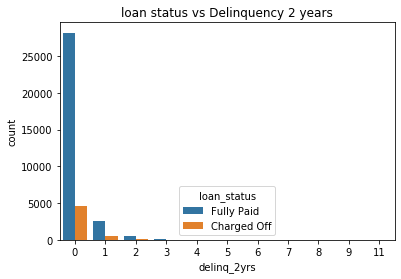

In [231]:
sns.countplot(data.delinq_2yrs, hue='loan_status', data=data)
plt.title('loan status vs Delinquency 2 years')

Text(0.5, 1.0, 'Purpose vs Delinquency 2 years')

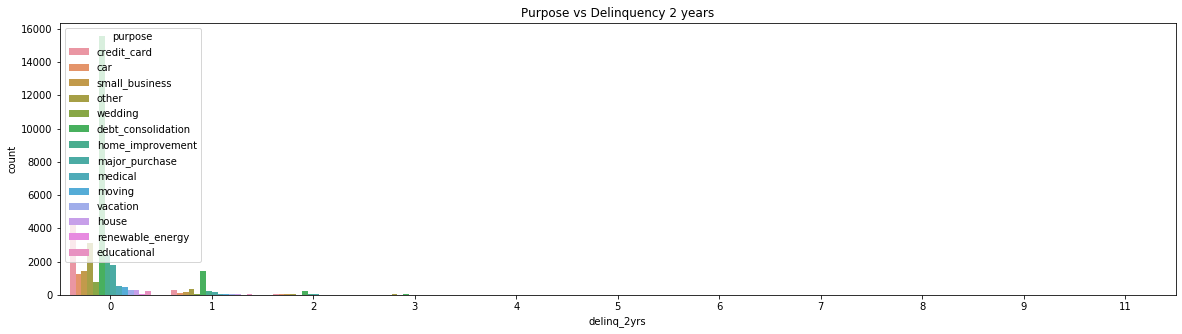

In [232]:
plt.figure(figsize=(20,5))
sns.countplot(data.delinq_2yrs, hue='purpose', data=data)
plt.title('Purpose vs Delinquency 2 years')

Text(0.5, 1.0, 'Employee length vs Delinquency 2 years')

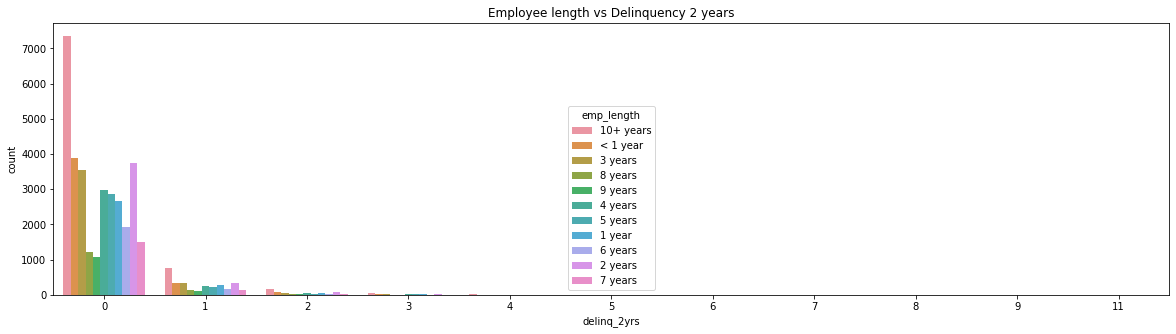

In [233]:
plt.figure(figsize=(20,5))
sns.countplot(data.delinq_2yrs, hue='emp_length', data=data)
plt.title('Employee length vs Delinquency 2 years')

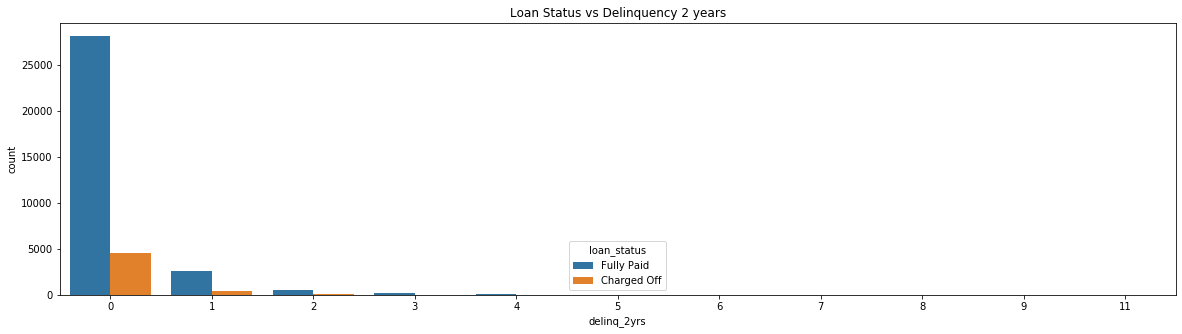

In [202]:
plt.figure(figsize=(20,5))
sns.countplot(data.delinq_2yrs, hue='loan_status', data=data)
plt.title('Loan Status vs Delinquency 2 years')
plt.show()

# inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

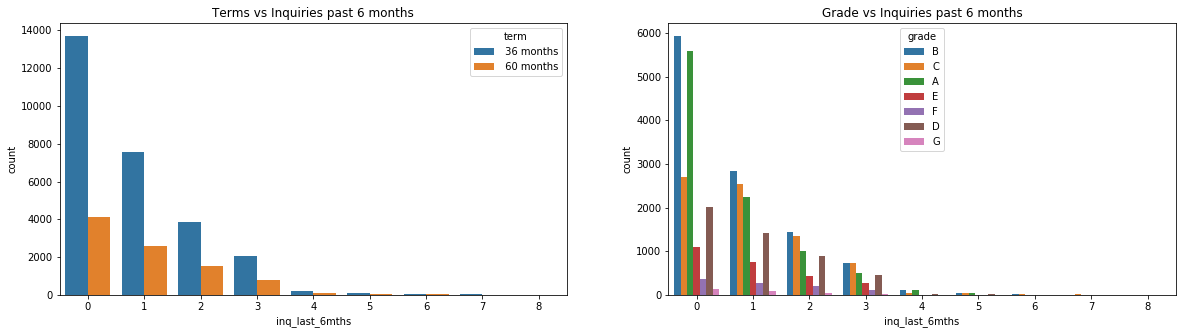

In [234]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.inq_last_6mths, hue='term', data=data)
plt.title('Terms vs Inquiries past 6 months')
plt.subplot(122)
plt.title('Grade vs Inquiries past 6 months')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.inq_last_6mths, hue='grade', data=data)

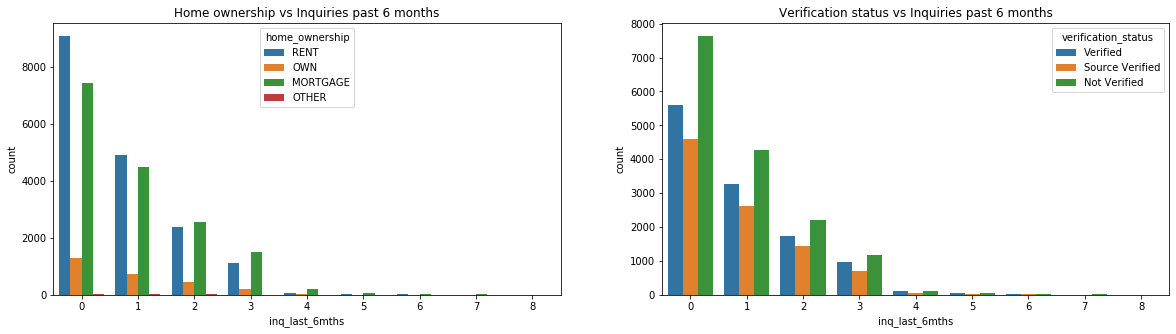

In [235]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.inq_last_6mths, hue='home_ownership', data=data)
plt.title('Home ownership vs Inquiries past 6 months')
plt.subplot(122)
plt.title('Verification status vs Inquiries past 6 months')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.inq_last_6mths, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Inquiries past 6 months')

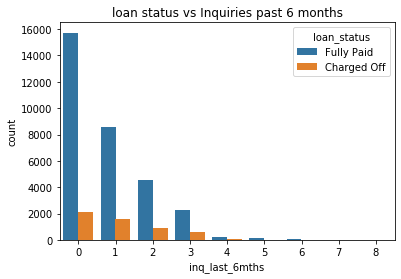

In [236]:
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('loan status vs Inquiries past 6 months')

Text(0.5, 1.0, 'Purpose vs Inquiries past 6 months')

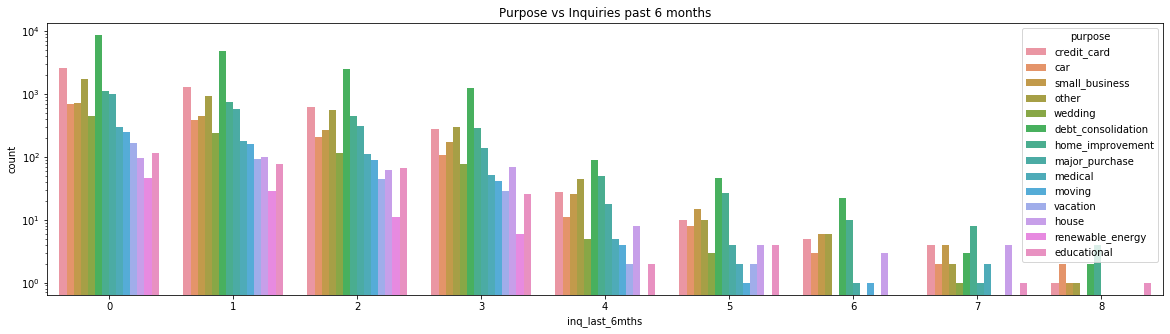

In [751]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='purpose', data=data)
plt.yscale('log')
plt.title('Purpose vs Inquiries past 6 months')

Text(0.5, 1.0, 'Employee length vs Inquiries past 6 months')

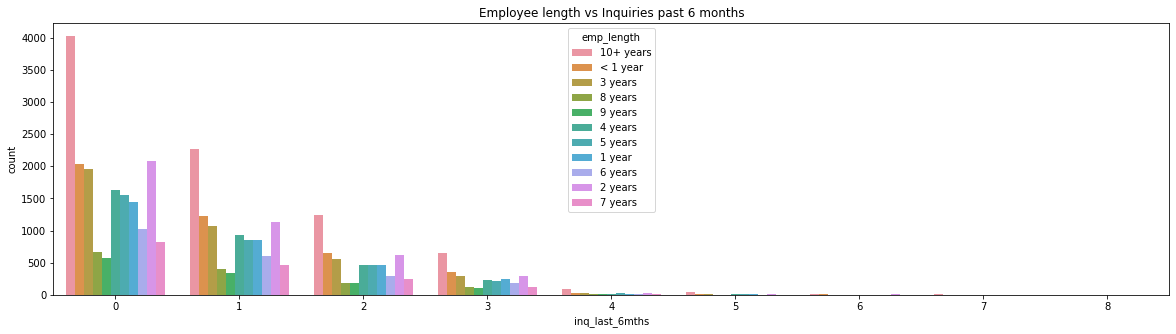

In [752]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='emp_length', data=data)
plt.title('Employee length vs Inquiries past 6 months')

# open_acc
The number of open credit lines in the borrower's credit file.

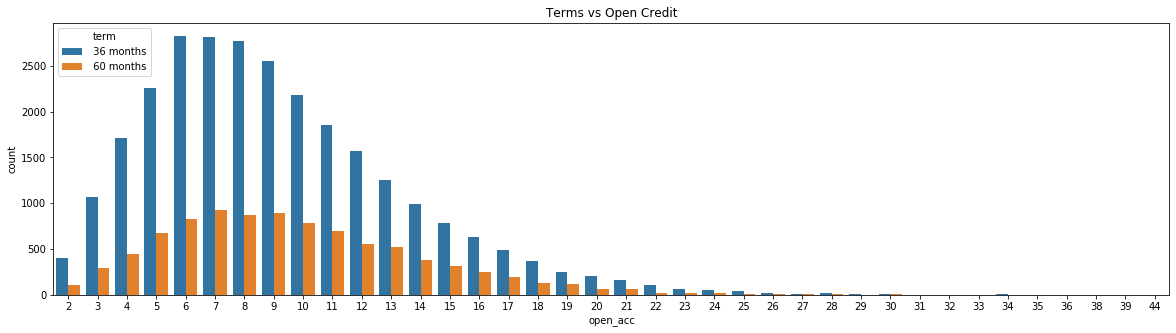

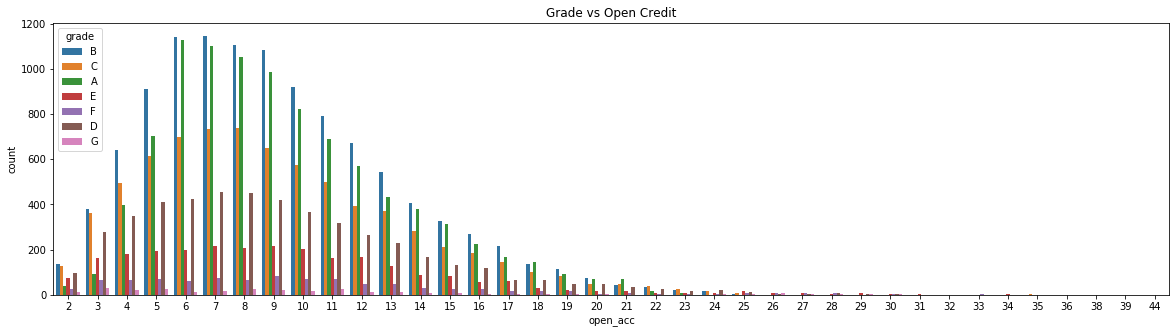

In [753]:
plt.figure(figsize=(20,5))
sns.countplot(data.open_acc, hue='term', data=data)
plt.title('Terms vs Open Credit')
plt.figure(figsize=(20,5))
plt.title('Grade vs Open Credit')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.open_acc, hue='grade', data=data)

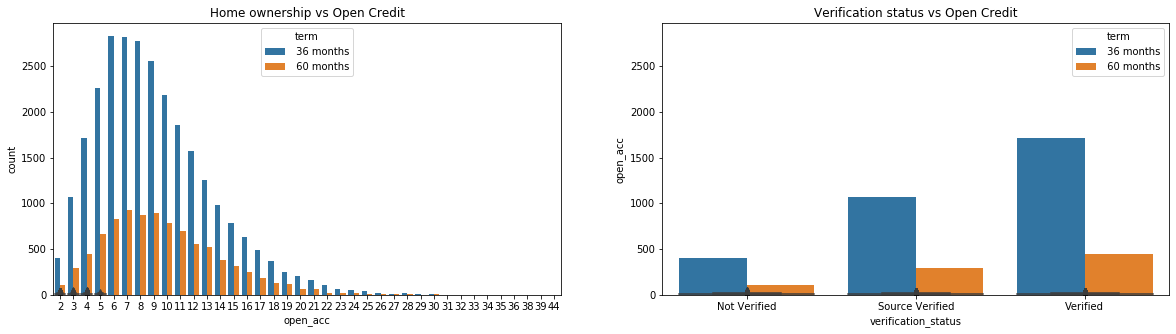

In [754]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.open_acc, data=data)
sns.countplot(data.open_acc, hue='term', data=data)
plt.title('Home ownership vs Open Credit')
plt.subplot(122)
plt.title('Verification status vs Open Credit')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.open_acc, hue='term', data=data)
sns.boxplot(x='verification_status', y=data.open_acc, order = verification_status_ord, data=data)

Text(0.5, 1.0, 'loan status vs Open Credit')

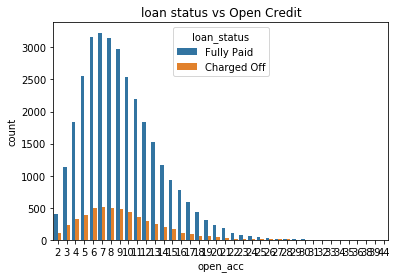

In [240]:
sns.countplot(data.open_acc, hue='loan_status', data=data)
plt.title('loan status vs Open Credit')

Text(0.5, 1.0, 'Purpose vs Open Credit')

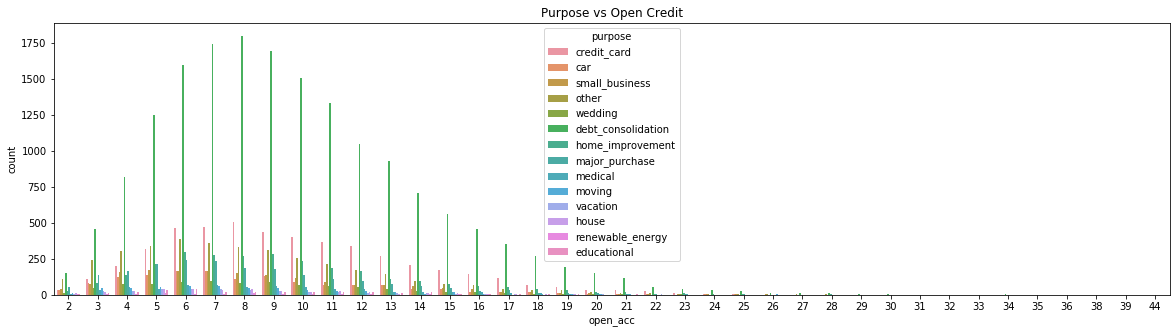

In [241]:
plt.figure(figsize=(20,5))
sns.countplot(data.open_acc, hue='purpose', data=data)
plt.title('Purpose vs Open Credit')

Text(0.5, 1.0, 'Employee length vs Open Credit')

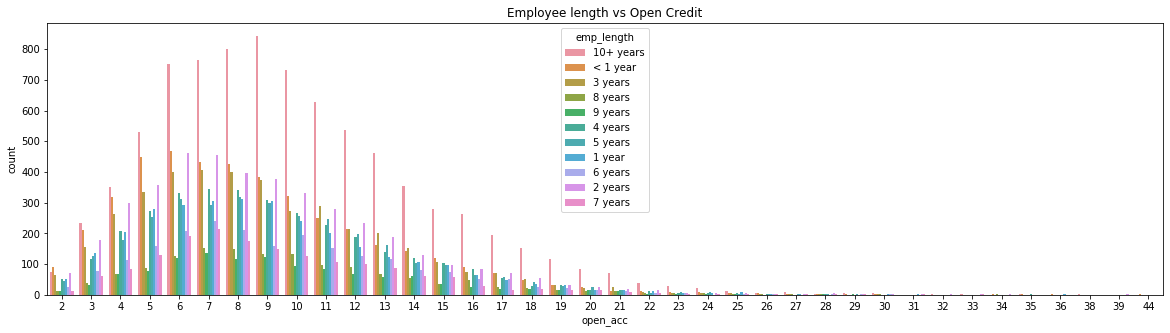

In [242]:
plt.figure(figsize=(20,5))
sns.countplot(data.open_acc, hue='emp_length', data=data)
plt.title('Employee length vs Open Credit')

# pub_rec
Number of derogatory public records

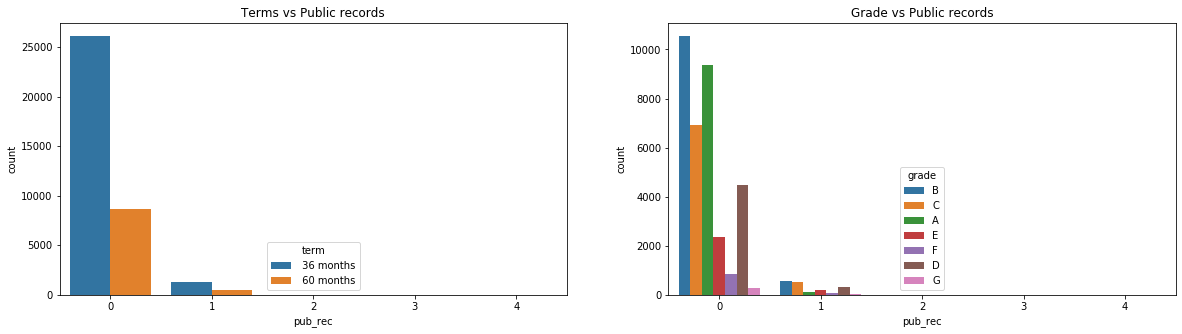

In [243]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec, hue='term', data=data)
plt.title('Terms vs Public records')
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec, hue='grade', data=data)

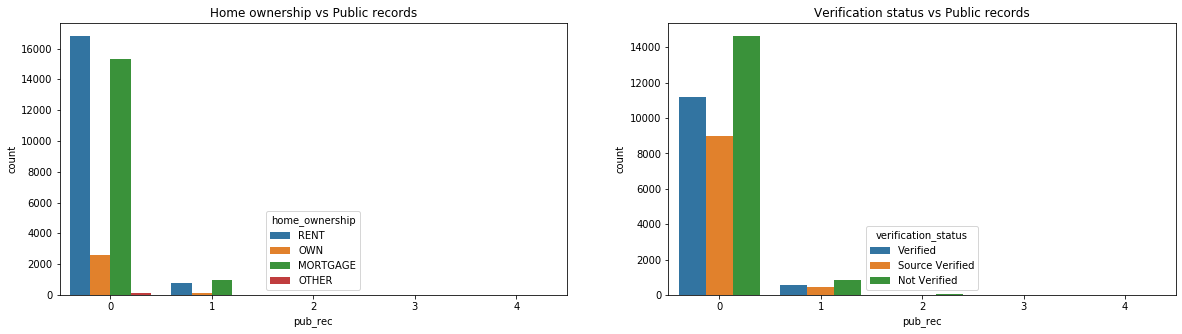

In [244]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec, hue='home_ownership', data=data)
plt.title('Home ownership vs Public records')
plt.subplot(122)
plt.title('Verification status vs Public records')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Public records')

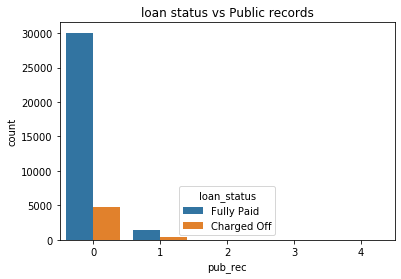

In [245]:
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.title('loan status vs Public records')

Text(0.5, 1.0, 'Purpose vs Public records')

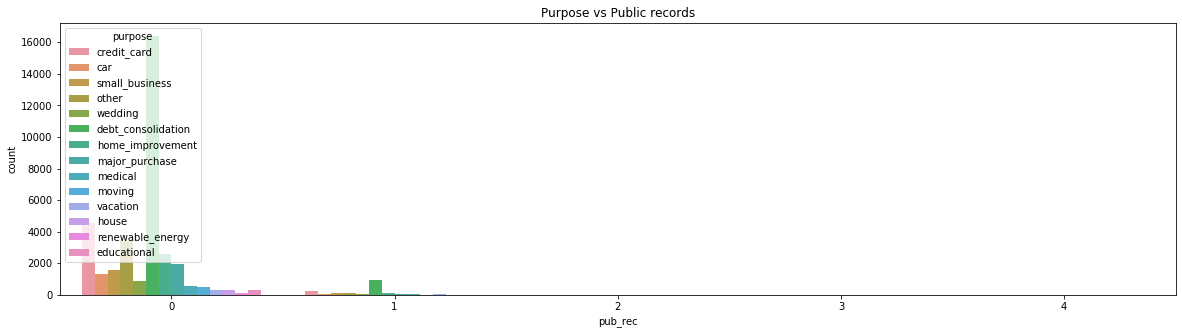

In [246]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

Text(0.5, 1.0, 'Employee length vs Public records')

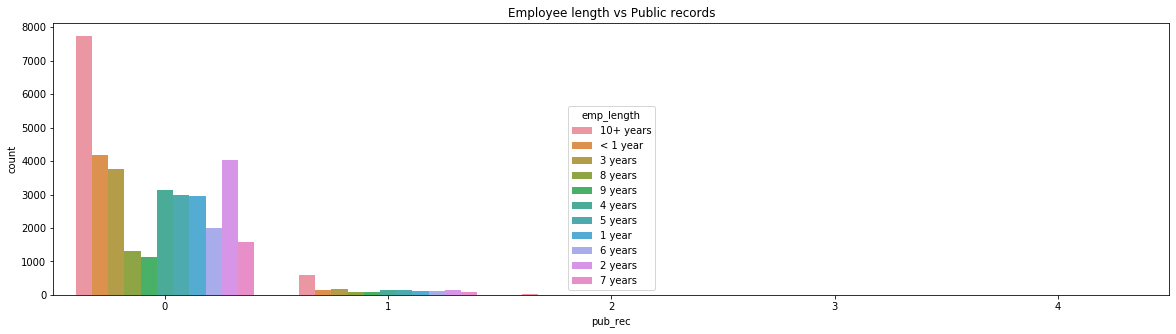

In [247]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='emp_length', data=data)
plt.title('Employee length vs Public records')

# pub_rec_bankruptcies
Number of public record bankruptcies

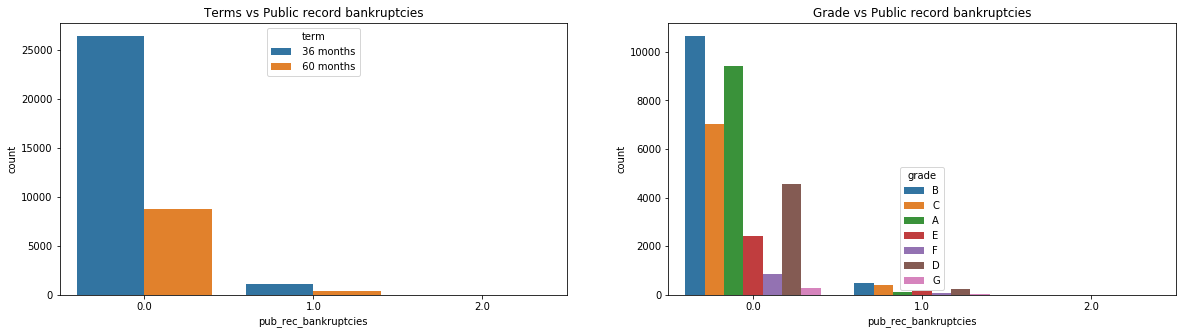

In [248]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

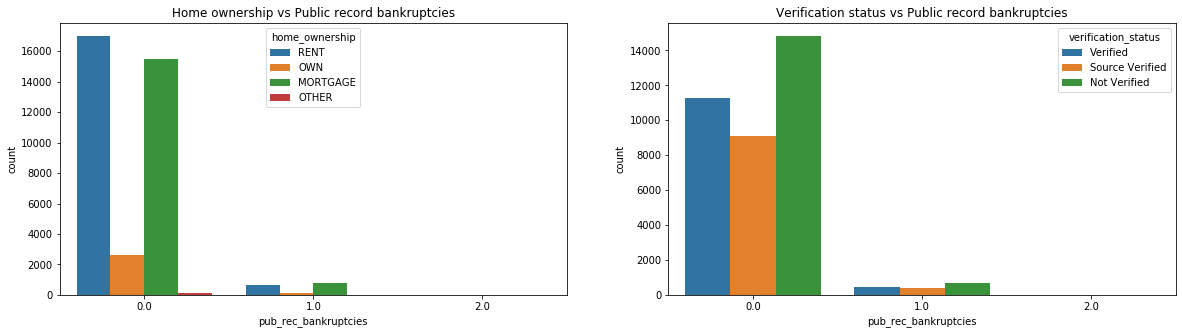

In [249]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

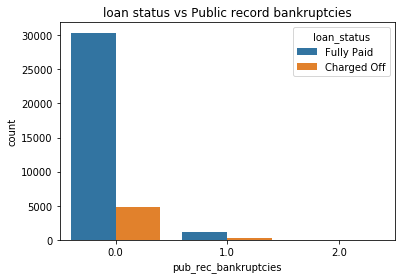

In [250]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

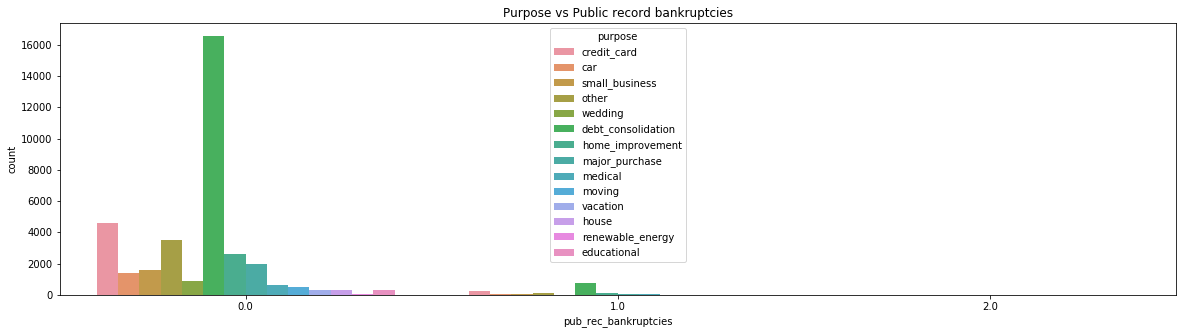

In [251]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

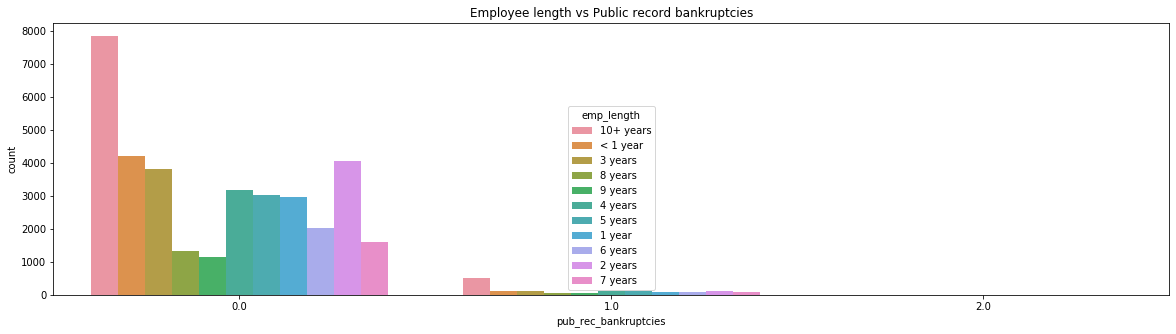

In [252]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

### inq_last_6mths

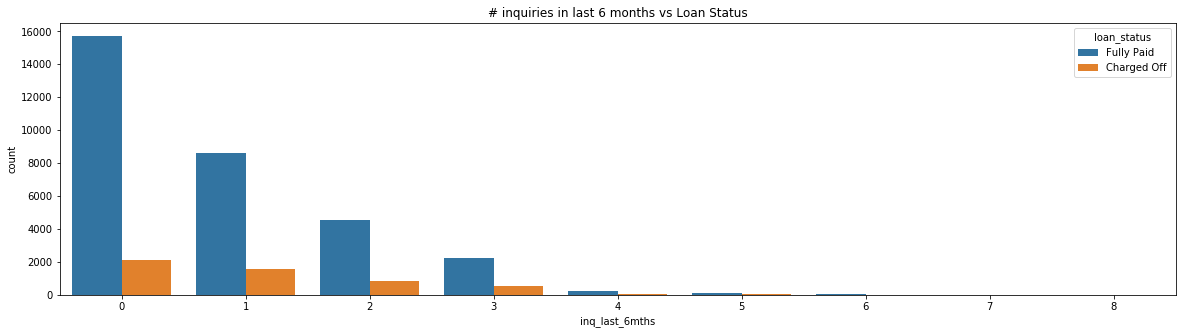

In [253]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

###  open_acc

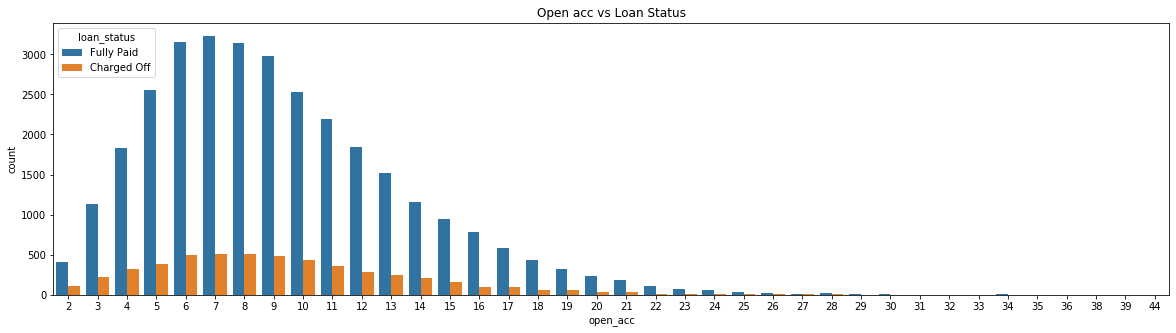

In [254]:
plt.figure(figsize=(20,5))
sns.countplot(data.open_acc, hue='loan_status', data=data)
plt.title('Open acc vs Loan Status')
plt.show()

### pub_rec

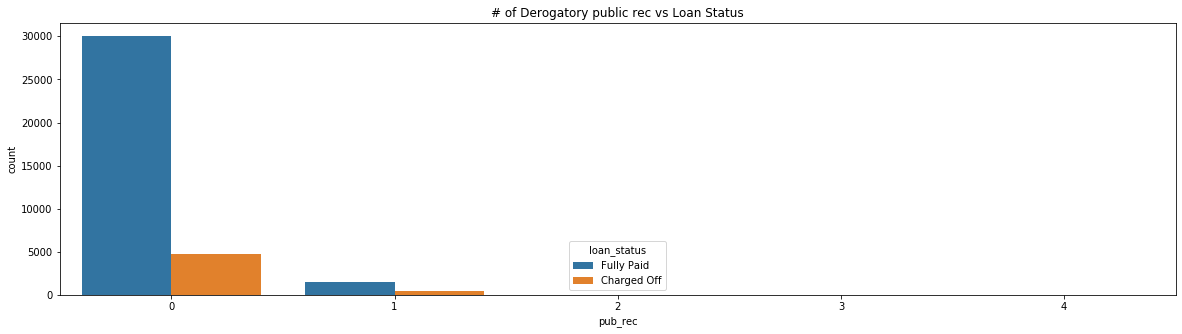

In [255]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.title('# of Derogatory public rec vs Loan Status')
plt.show()

### pub_rec_bankruptcies

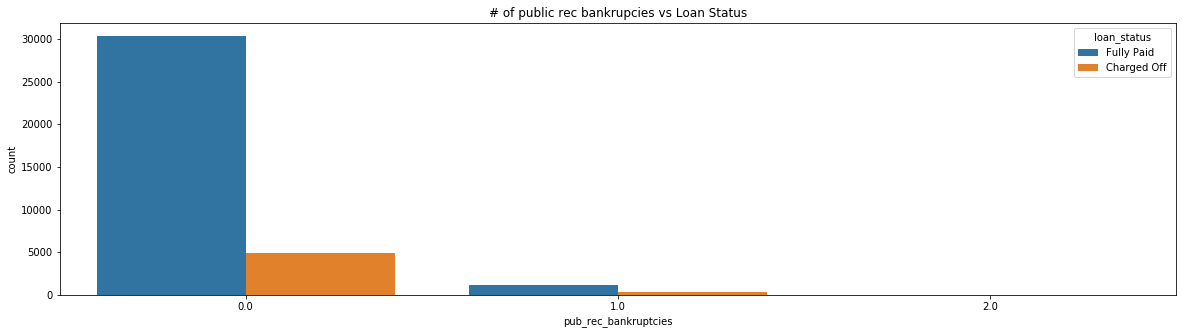

In [256]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('# of public rec bankrupcies vs Loan Status')
plt.show()

<hr>

## Bivariate Analysis

### Term vs Loan Status

In [ ]:
sns.countplot(data.term, hue='loan_status', data=data)
plt.title('Term vs Loan status')

In [ ]:
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

In [ ]:
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

### Grade vs Loan Status

In [ ]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='grade', hue='loan_status', data=data)
plt.title('Grade vs Loan status')

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = ['A', 'B', 'C', 'D', 'E', 'F'], estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

### Employment Length

In [ ]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='emp_length', hue='loan_status', data=data)
plt.title('Employmeny length vs Loan Status')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

### Home Ownership

In [ ]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='home_ownership', hue='loan_status', data=data)
plt.title('Home Ownership vs Loan Status')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

### Address State

In [ ]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Home Ownership vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Home Ownership vs Fully Paid')
plt.show()

### Verfication Status

In [ ]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
#df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

In [ ]:
sns.countplot(x='verification_status', hue='loan_status', data=data)
plt.title('Verification Status vs Loan Status')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Verification Status vs loan amount')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Verification Status vs interest rate')
plt.show()

### Purpose

In [ ]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', hue='loan_status', hue_order=['Fully Paid', 'Charged Off'], data=df)
plt.xticks(rotation=90)
plt.title('Grade vs Loan status')

In [ ]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Verification Status vs loan amount')
plt.show()

(21.0, 0.0)

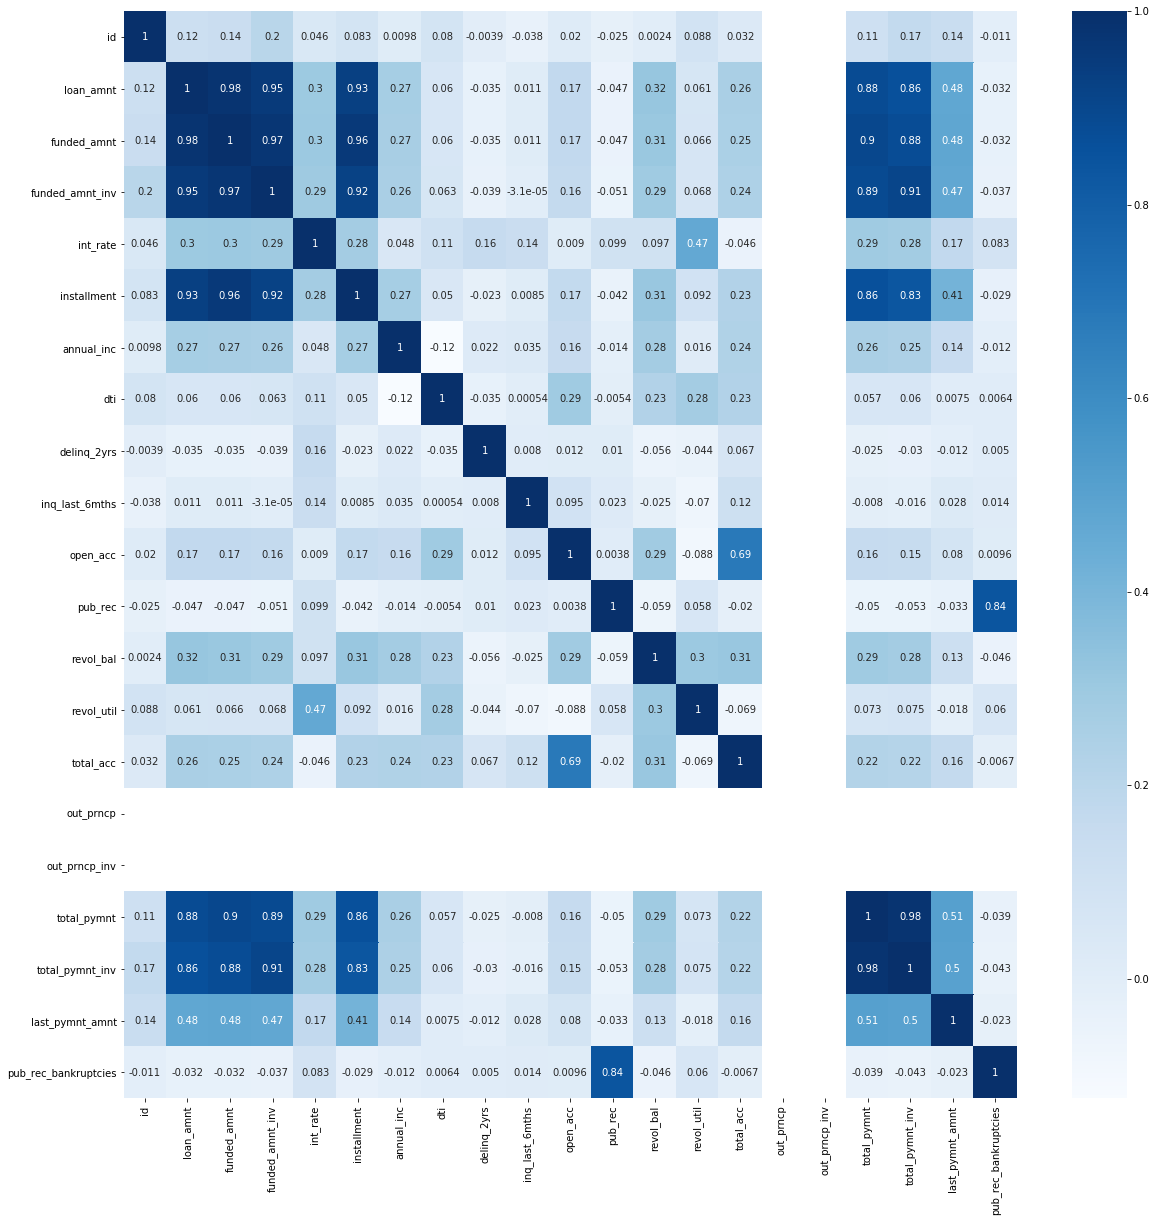

In [745]:
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)